In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.special import boxcox1p, inv_boxcox1p
from scipy.stats import boxcox_normmax

# EDA:Exploratory Data Analysis


In [2]:
train =pd.read_csv(r"C:\Users\vaibh\Desktop\house-prices-advanced-regression-techniques\train.csv")
train.drop(['Id'], axis=1, inplace=True)
train.shape

(1460, 80)

In [4]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
!pip install missingno

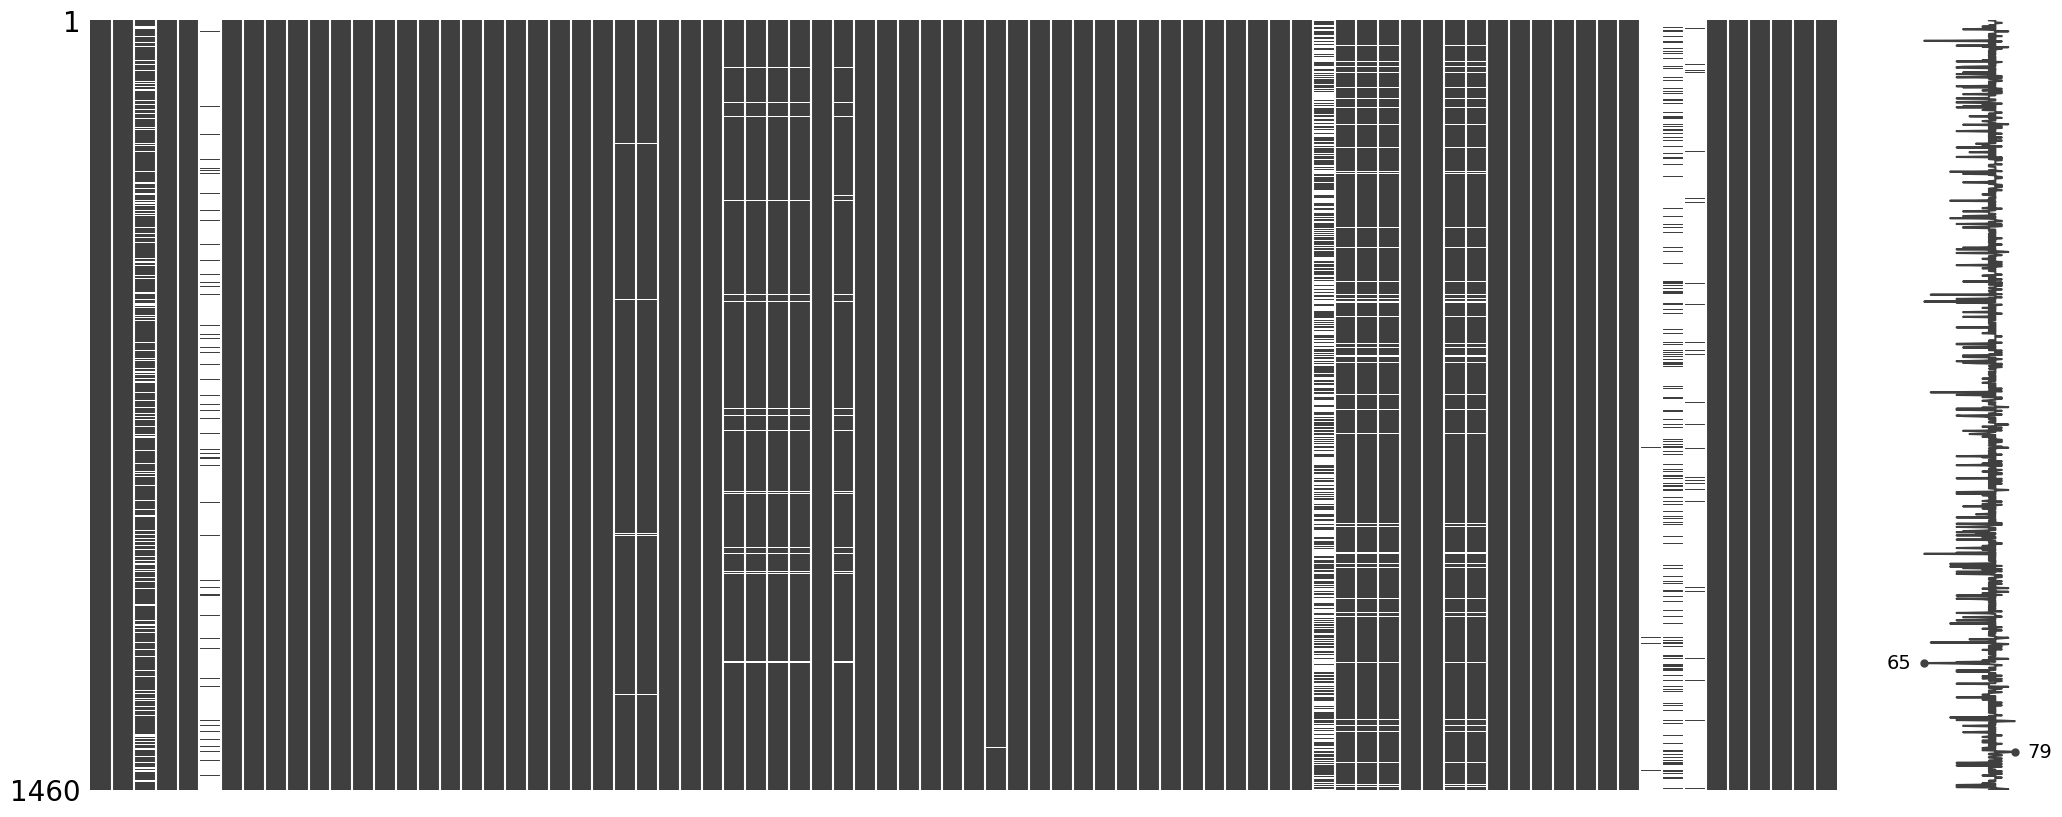

In [5]:
import missingno as msno

msno.matrix(train);
plt.show()

In [6]:
all_data_na = (train.isnull().sum() / len(train)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({"Missing Ratio" :all_data_na})
missing_data.head(10)

,Missing Ratio
PoolQC,99.520548
MiscFeature,96.301370
Alley,93.767123
Fence,80.753425
FireplaceQu,47.260274
LotFrontage,17.739726
GarageType,5.547945
GarageYrBlt,5.547945
GarageFinish,5.547945
GarageQual,5.547945


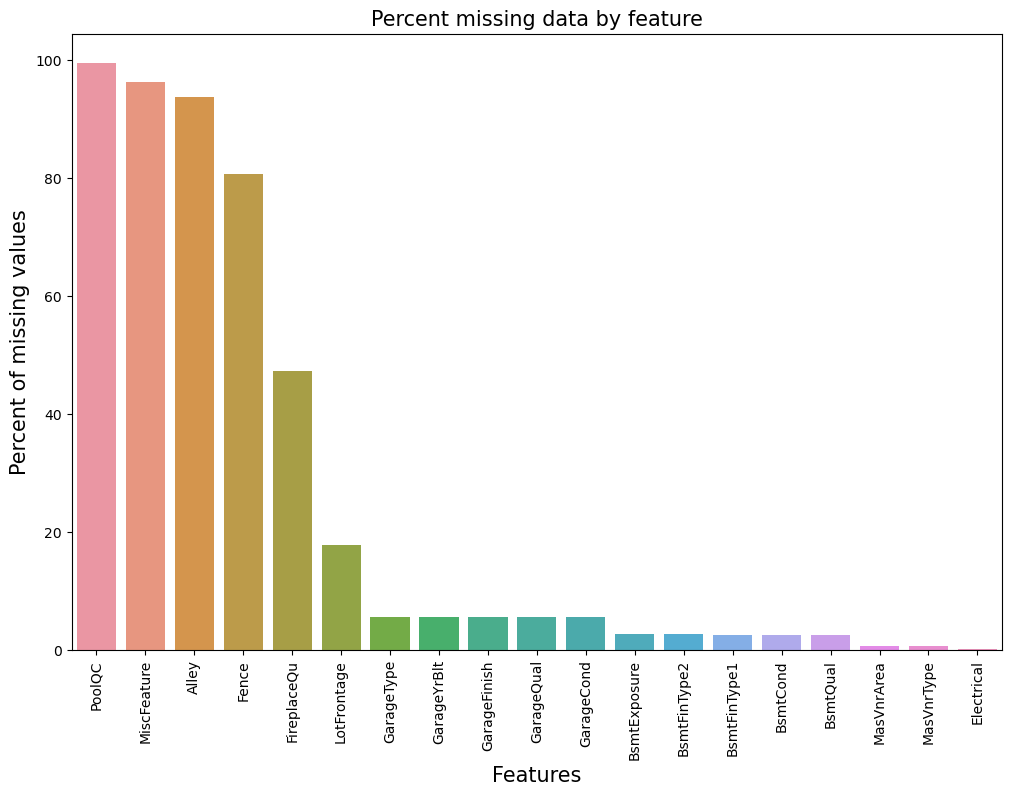

In [7]:
f, ax = plt.subplots(figsize=(12, 8))
plt.xticks(rotation=90)
sns.barplot(x=all_data_na.index, y=all_data_na);
plt.xlabel("Features", fontsize=15)
plt.ylabel("Percent of missing values", fontsize=15)
plt.title("Percent missing data by feature", fontsize=15)
plt.show()

In [8]:
for col in ("PoolQC", "MiscFeature", "Alley", "Fence", "FireplaceQu"):
    train[col] = train[col].fillna("No_" + col)

for col in ("GarageType", "GarageFinish", "GarageQual", "GarageCond"):
    train[col] = train[col].fillna("No_Garage")
    
for col in ("GarageYrBlt", "GarageArea", "GarageCars"):
    train[col] = train[col].fillna(0)
    
for col in ("BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF","TotalBsmtSF", "BsmtFullBath", "BsmtHalfBath"):
    train[col] = train[col].fillna(0)
    
for col in ("BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2"):
    train[col] = train[col].fillna("No_" + col)
train_modes_to_fill = {}
for col in ("MSZoning", "Electrical", "KitchenQual", "Exterior1st", "Exterior2nd", "SaleType"):
    train_modes_to_fill[col] = train[col].mode()[0]
    train[col] = train[col].fillna(train_modes_to_fill[col])
    
means_lot_frontage = train.groupby("Neighborhood")["LotFrontage"].median()
train["LotFrontage"] = train.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(means_lot_frontage[x.name]))
    
train.drop(['Utilities'], axis=1, inplace=True)

train["MasVnrArea"] = train["MasVnrArea"].fillna(0)
train["MasVnrType"] = train["MasVnrType"].fillna("None")
train["Functional"] = train["Functional"].fillna("Typ")

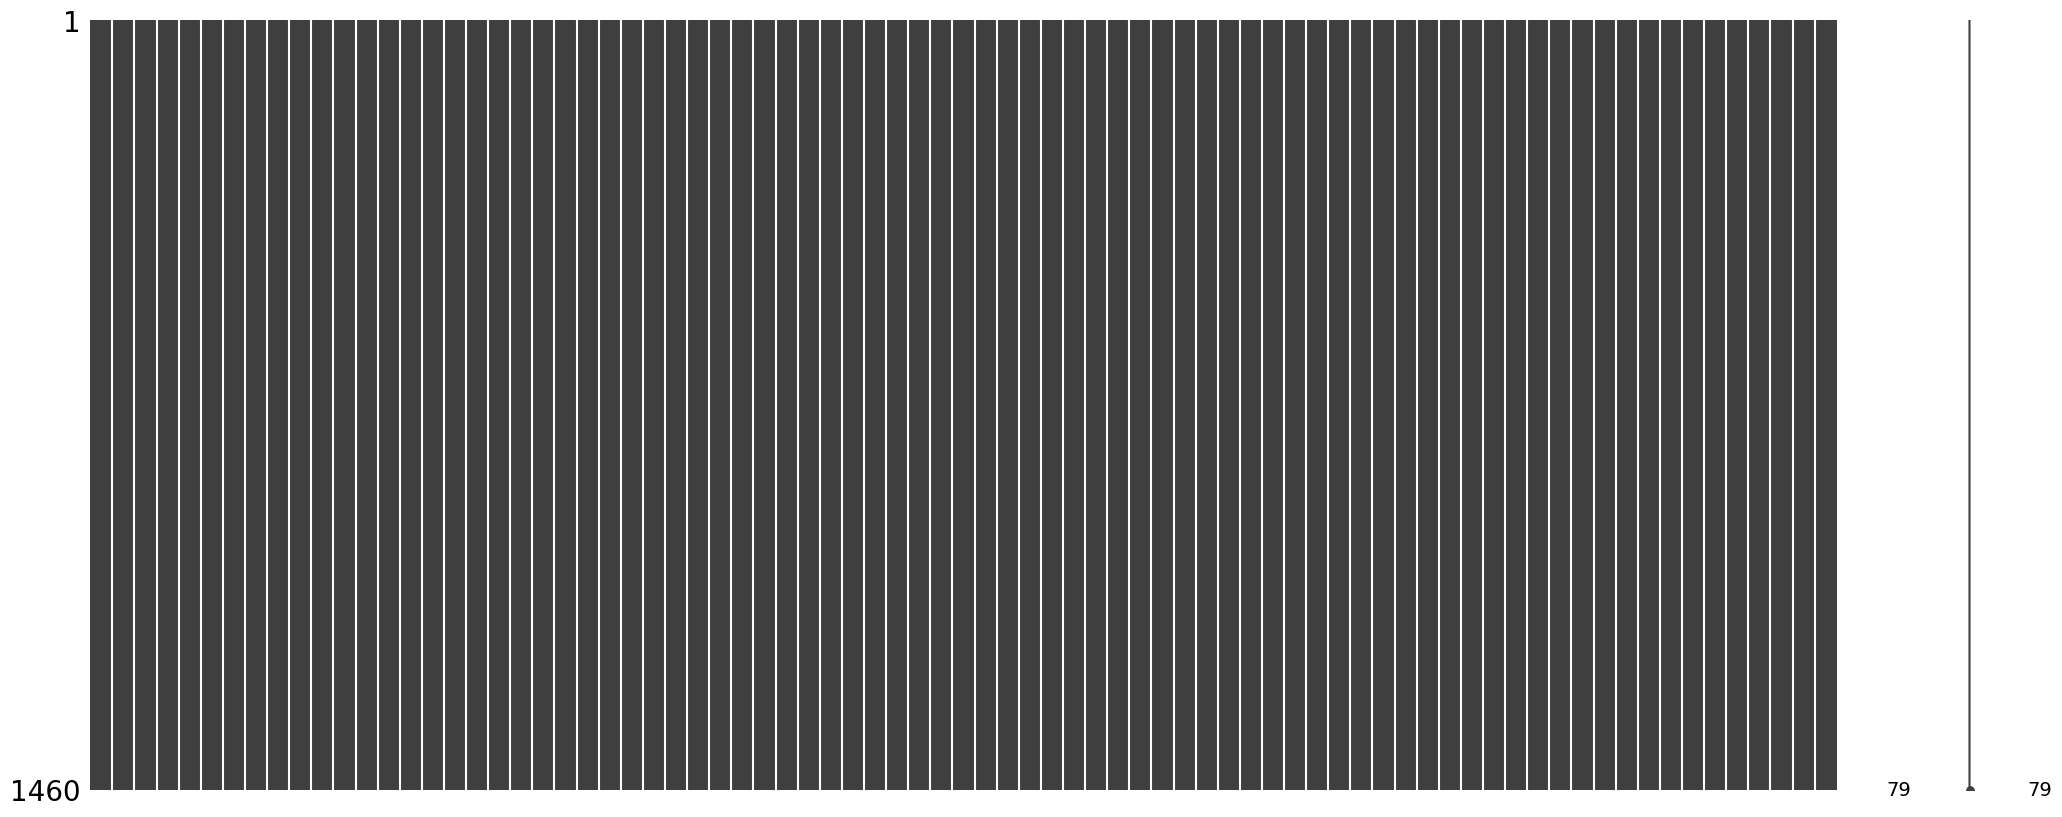

,Missing Ratio


In [9]:
msno.matrix(train);
plt.show()
all_data_na = (train.isnull().sum() / len(train)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({"Missing Ratio" :all_data_na})
missing_data.head()

Feature #0: MSSubClass


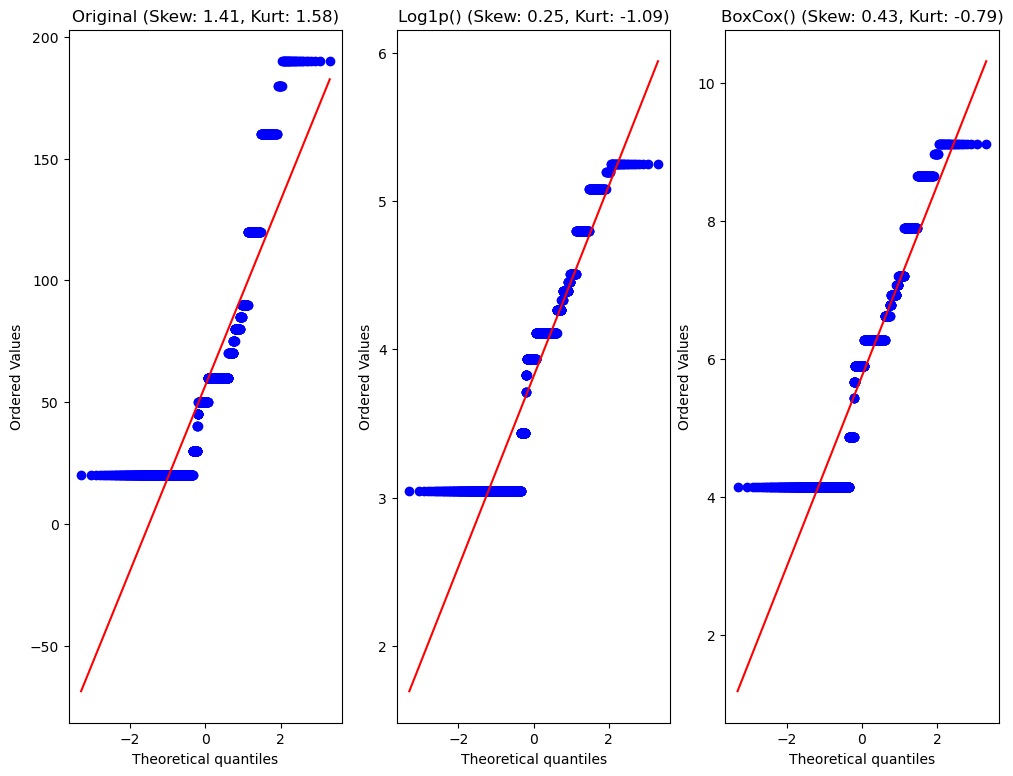

Feature #1: LotFrontage


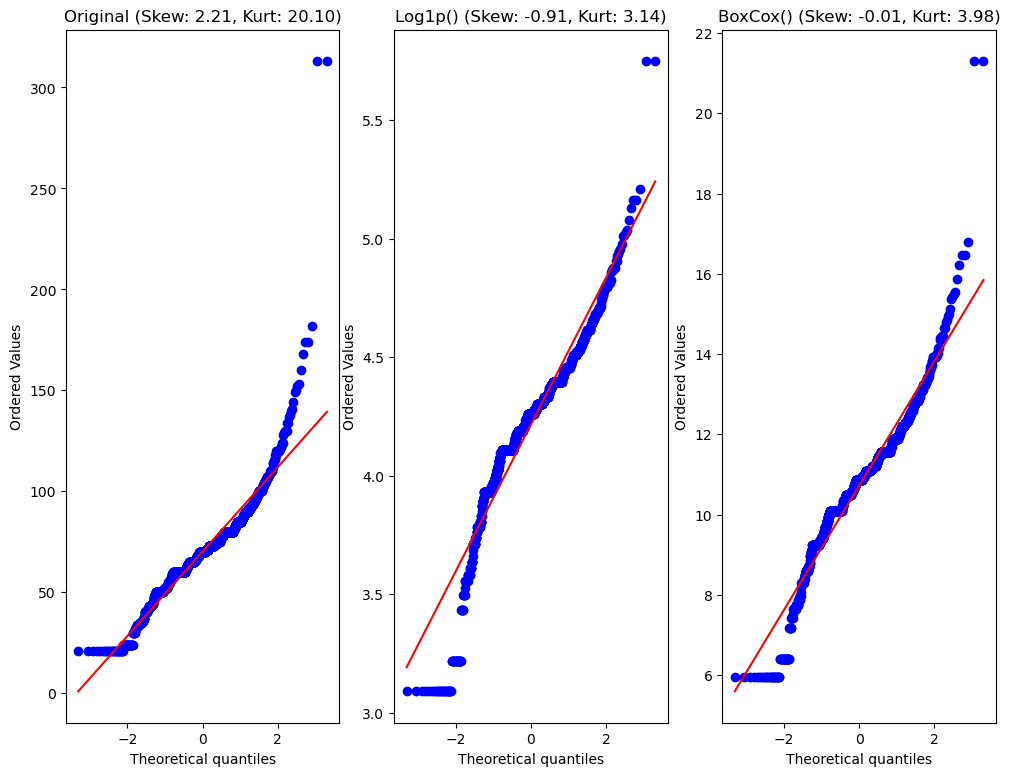

Feature #2: LotArea


C:\Users\vaibh\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
C:\Users\vaibh\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:4461: NearConstantInputWarning: An input array is nearly constant; the computed correlation coefficient may be inaccurate.
  warnings.warn(stats.NearConstantInputWarning(msg))


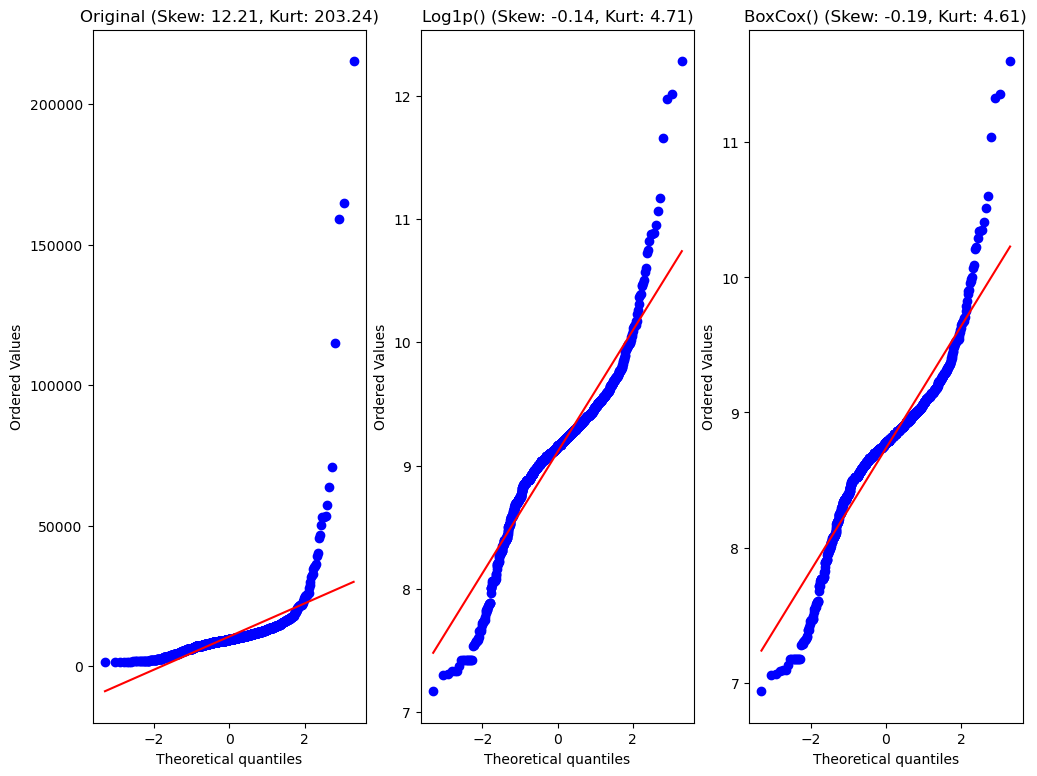

Feature #3: OverallQual


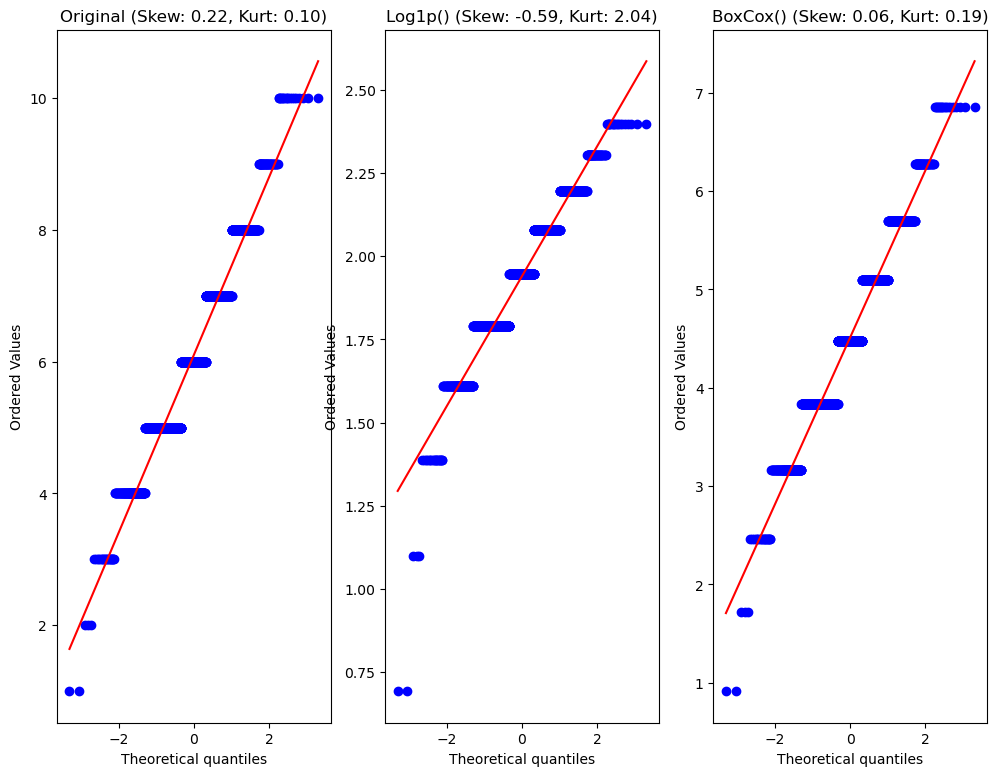

Feature #4: OverallCond


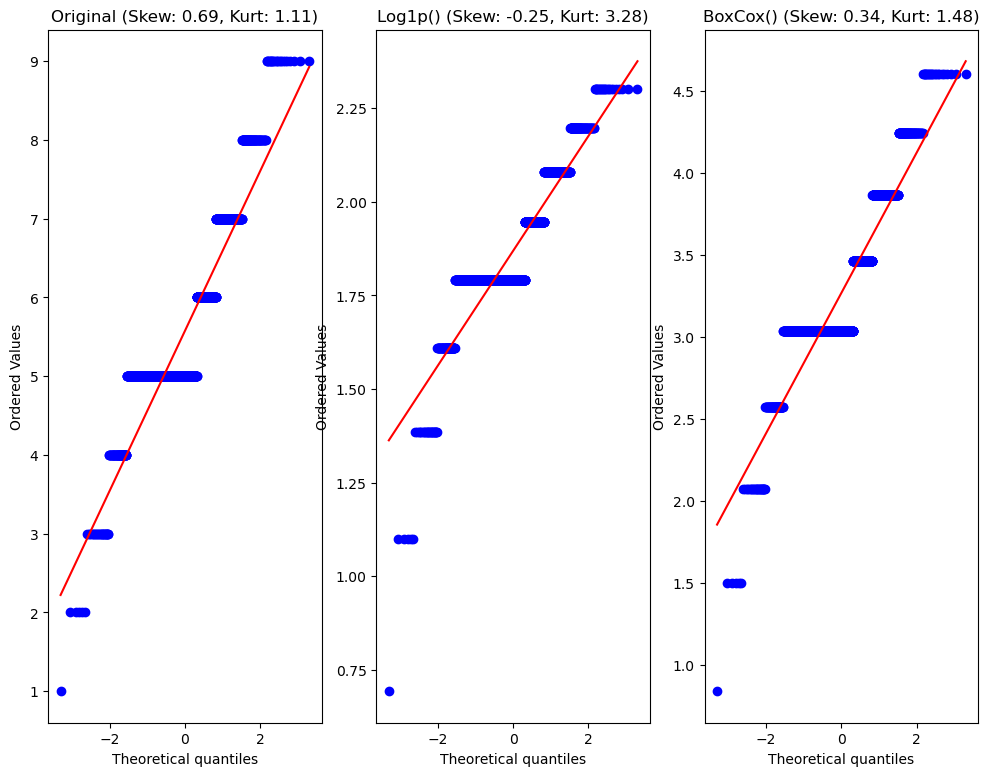

Feature #5: YearBuilt


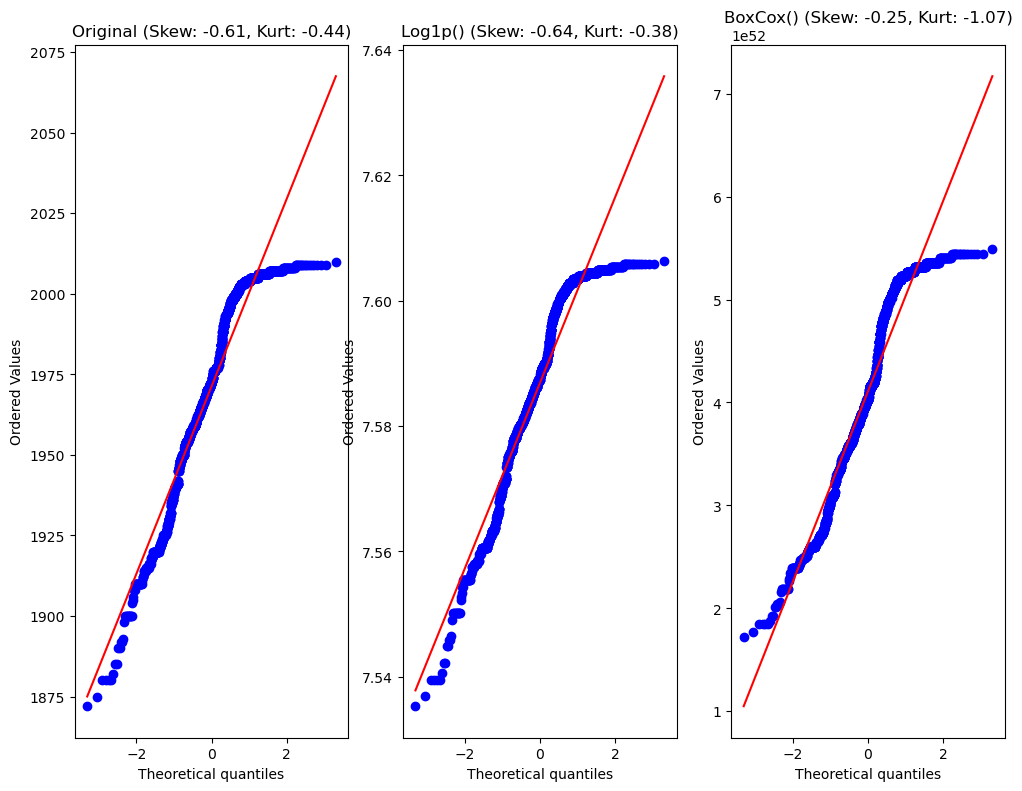

Feature #6: YearRemodAdd


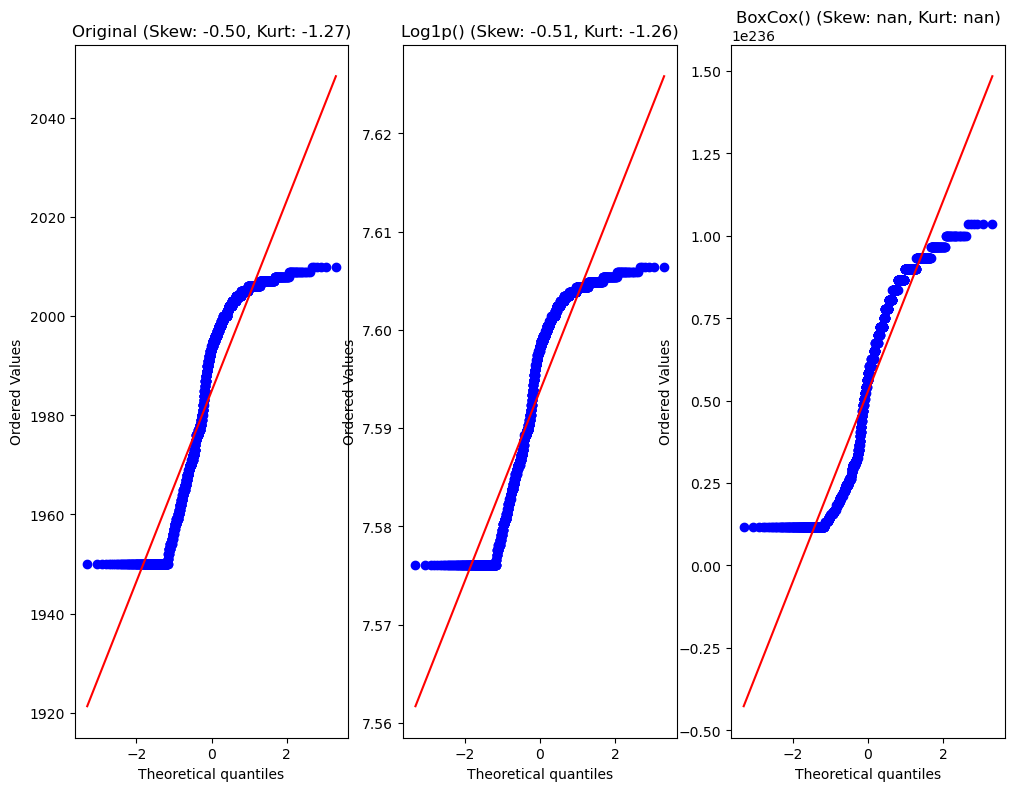

Feature #7: MasVnrArea


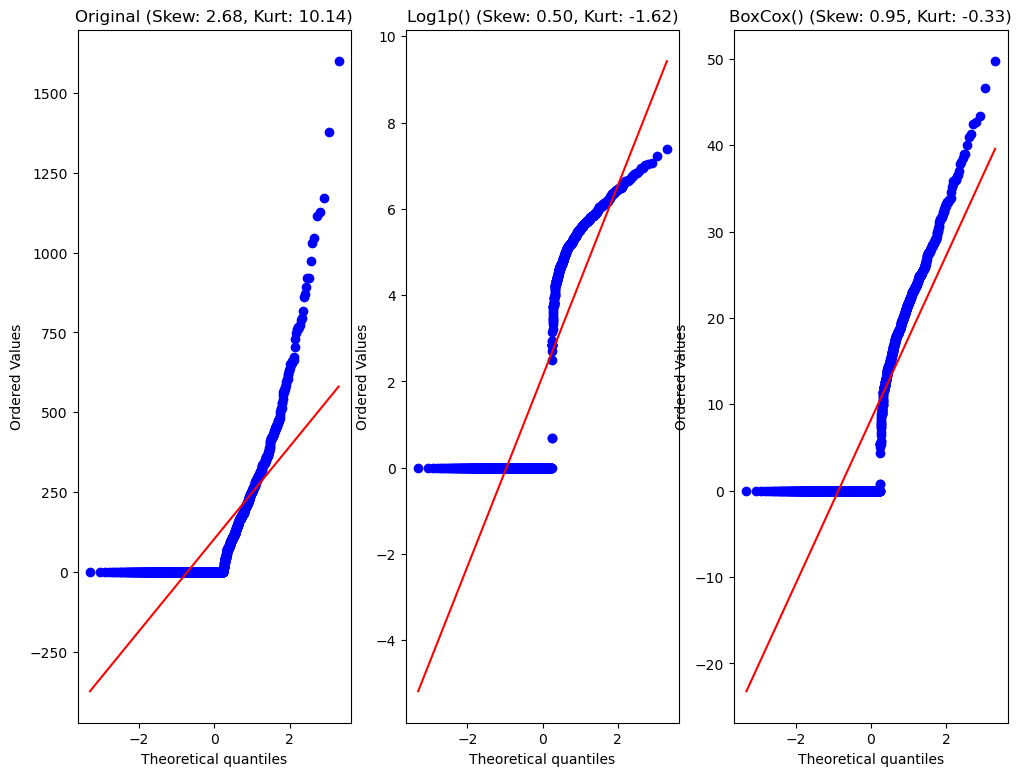

Feature #8: BsmtFinSF1


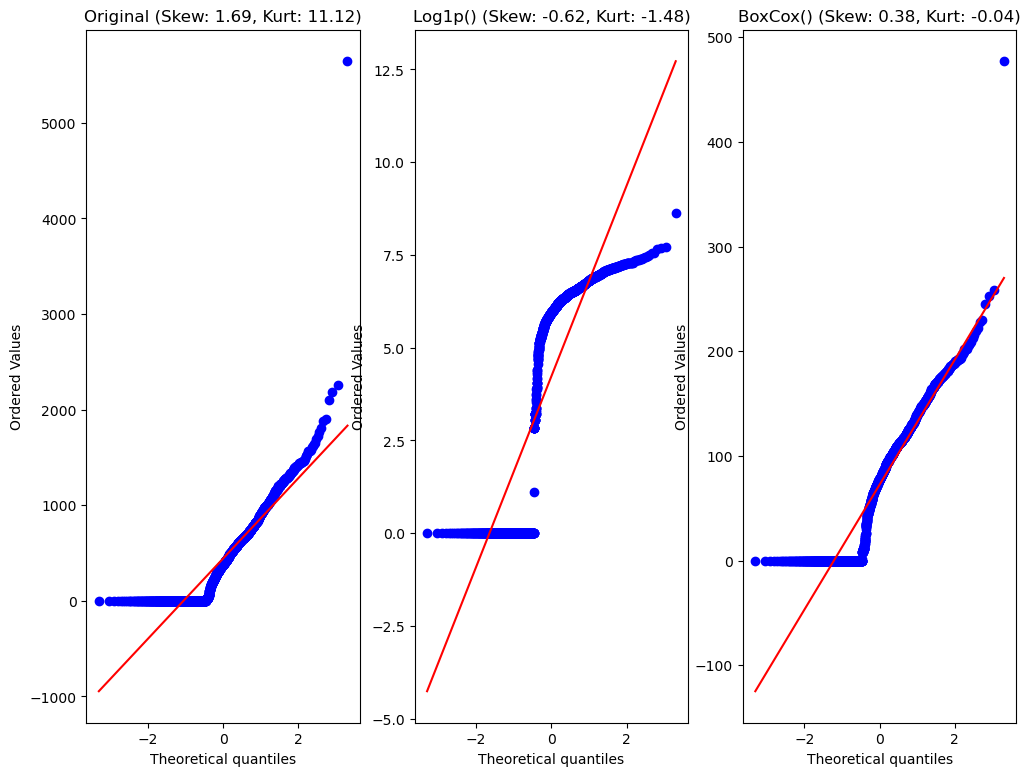

Feature #9: BsmtFinSF2


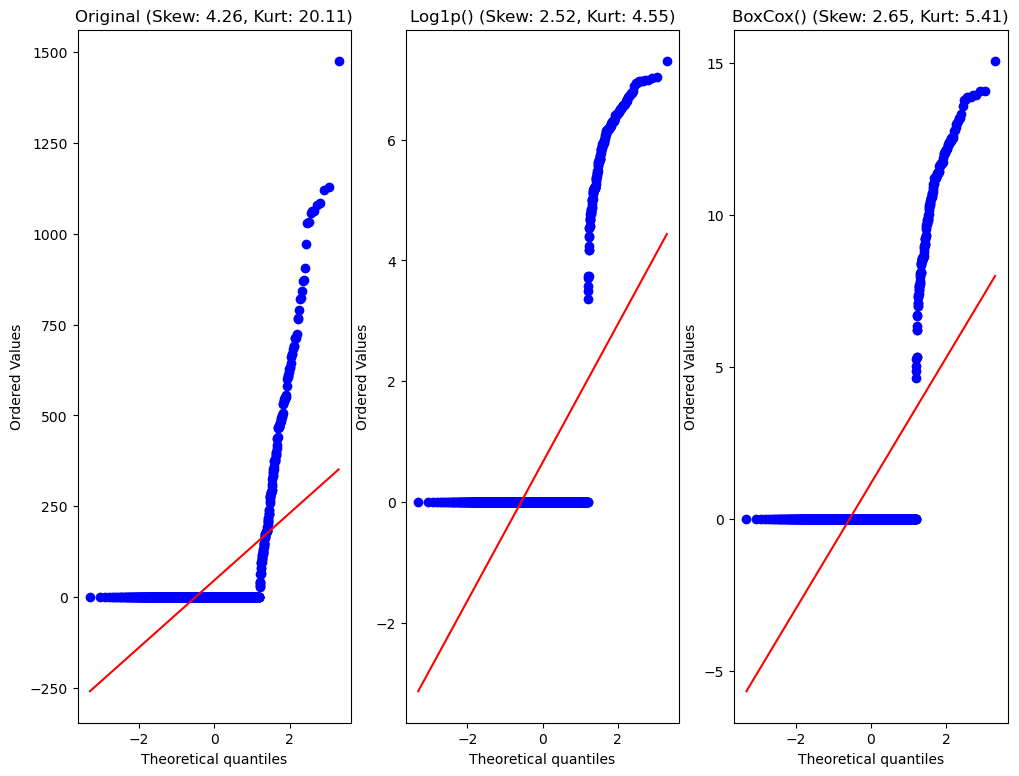

Feature #10: BsmtUnfSF


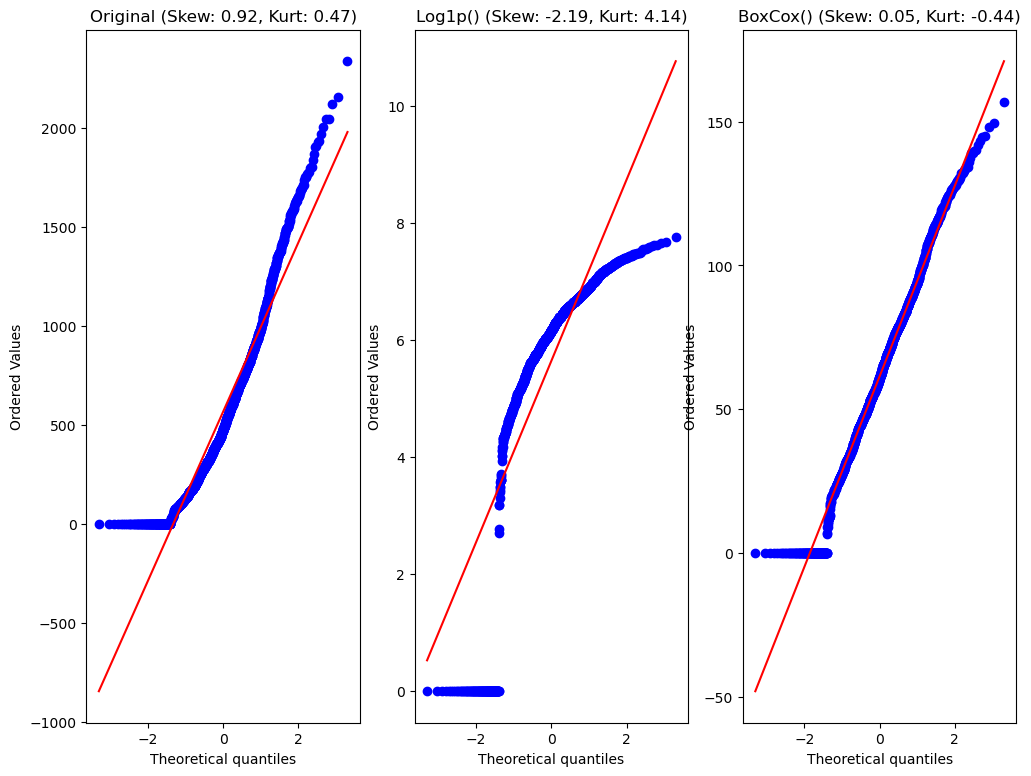

Feature #11: TotalBsmtSF


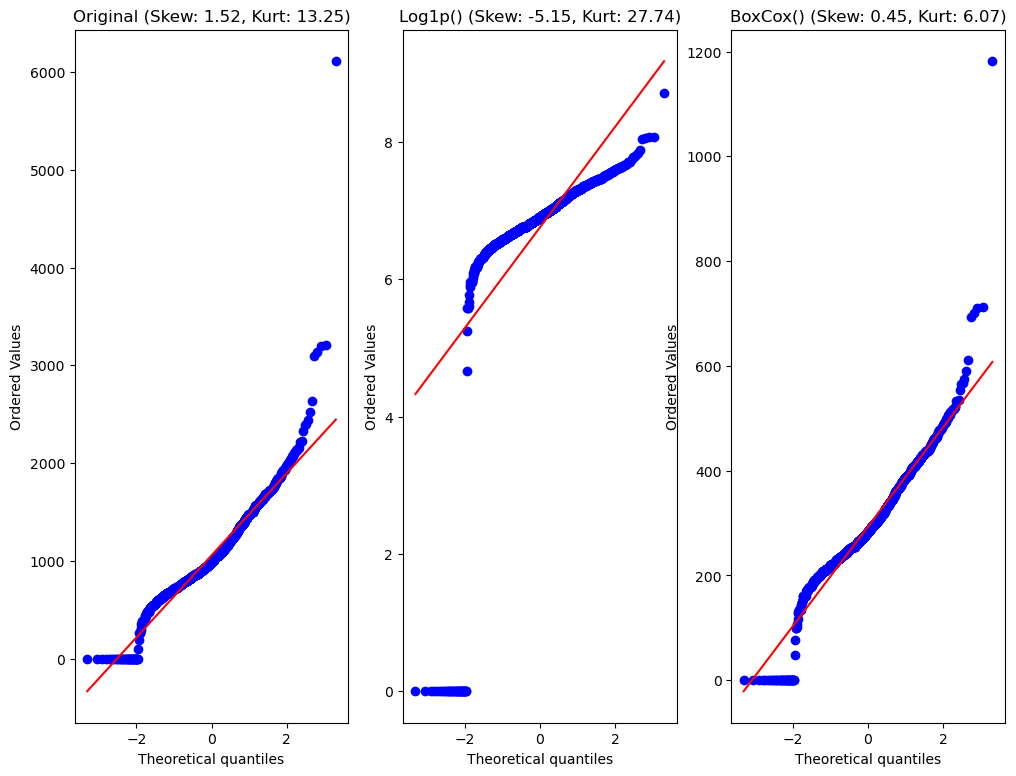

Feature #12: 1stFlrSF


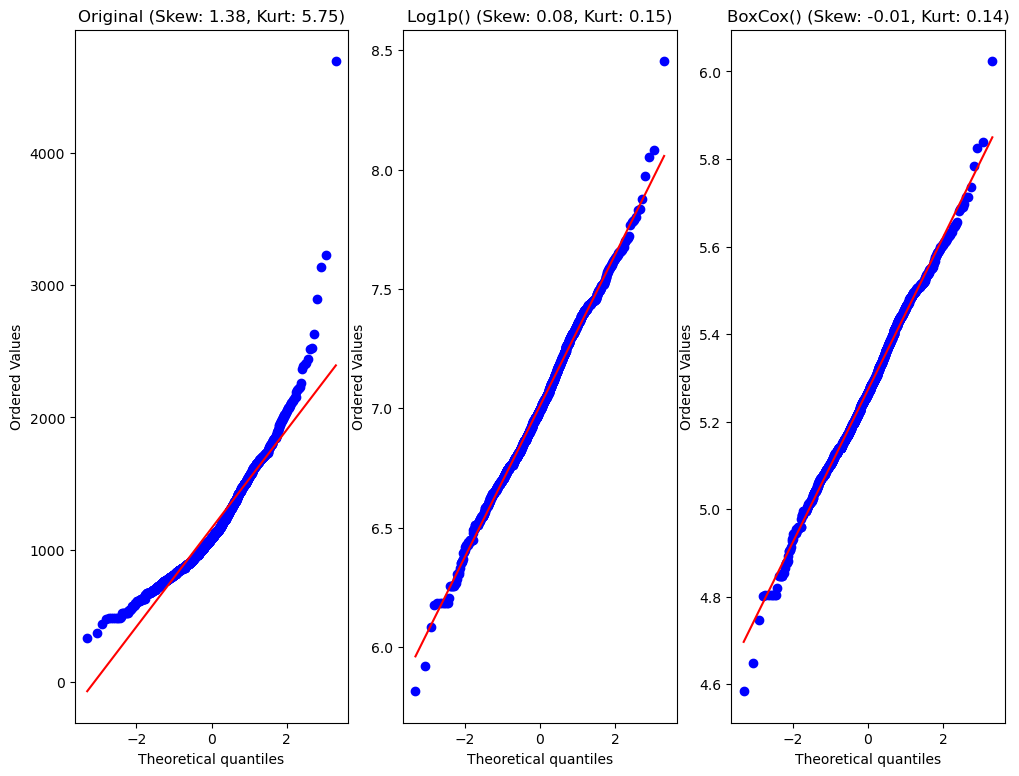

Feature #13: 2ndFlrSF


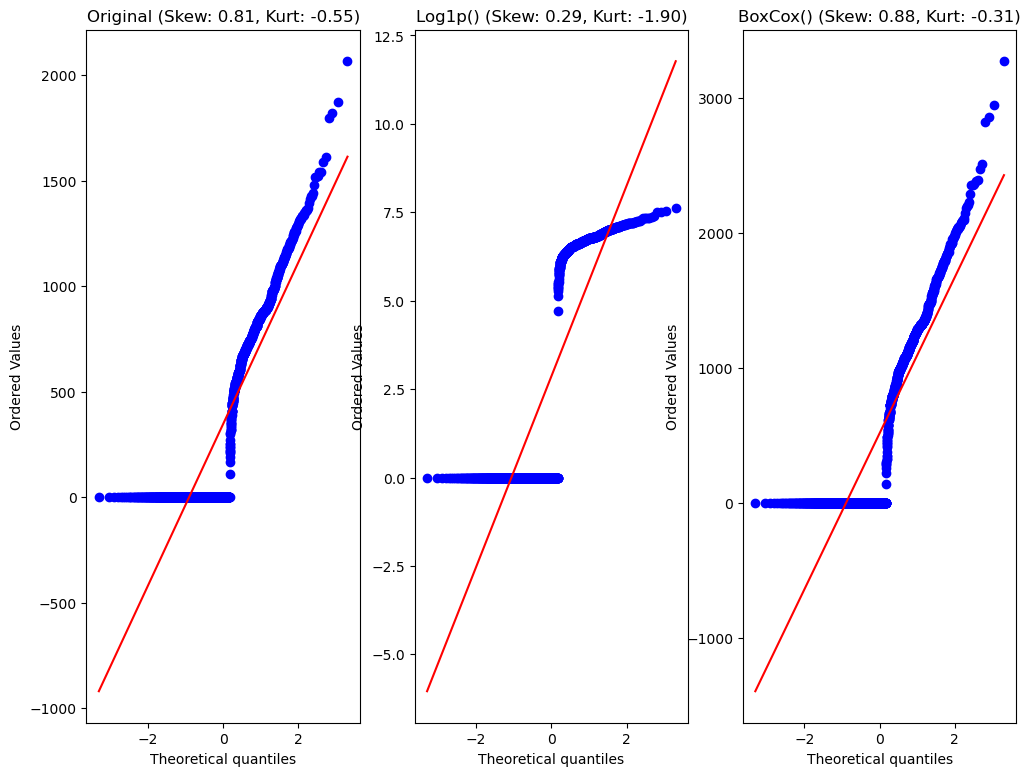

Feature #14: LowQualFinSF


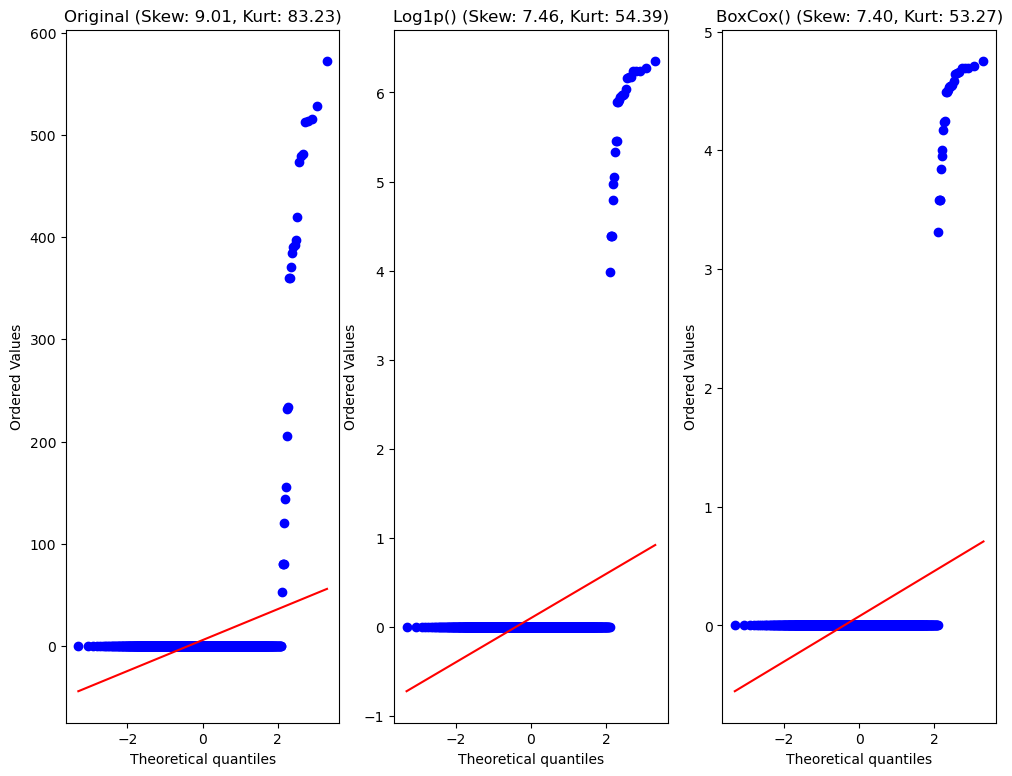

Feature #15: GrLivArea


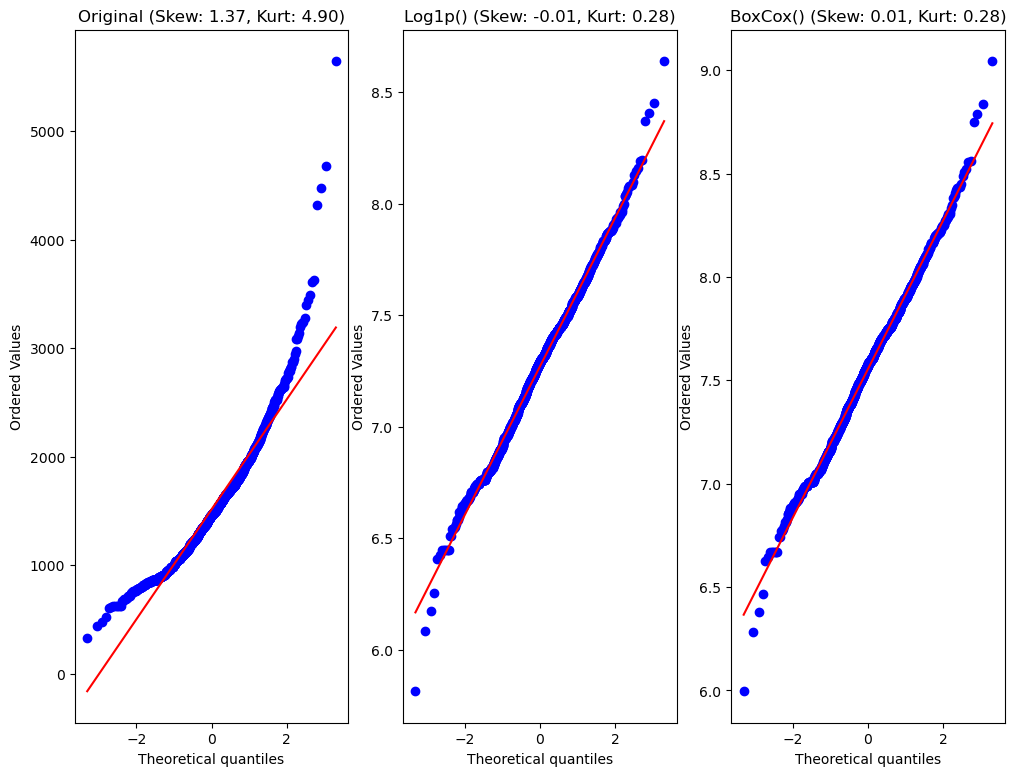

Feature #16: BsmtFullBath


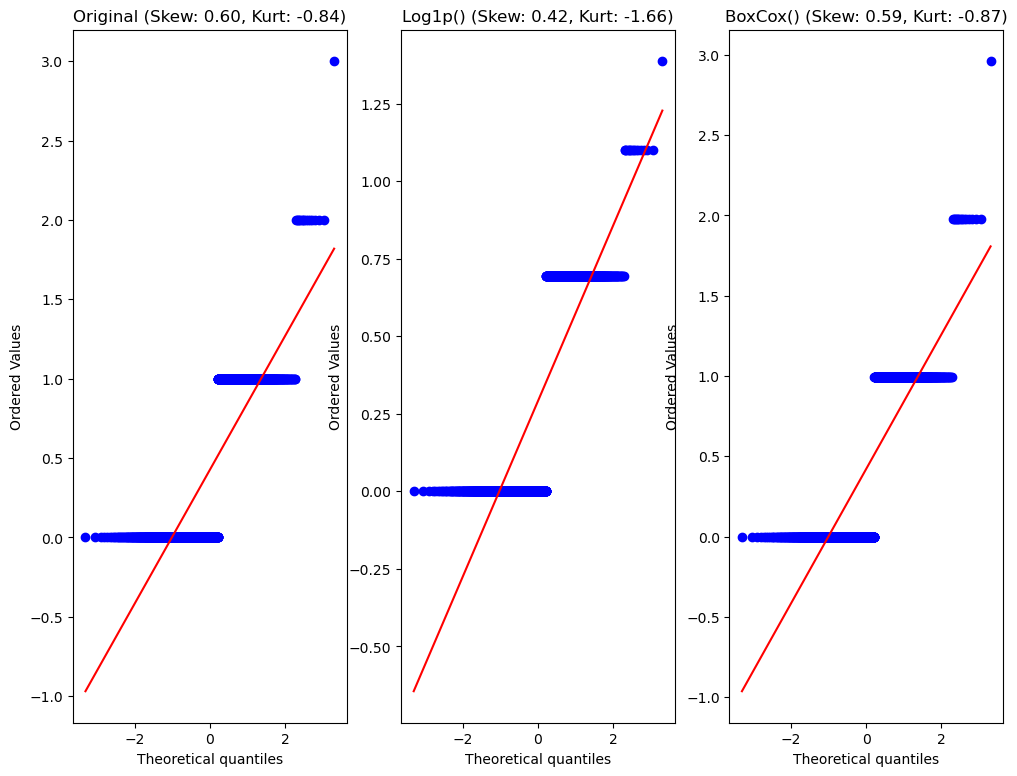

Feature #17: BsmtHalfBath


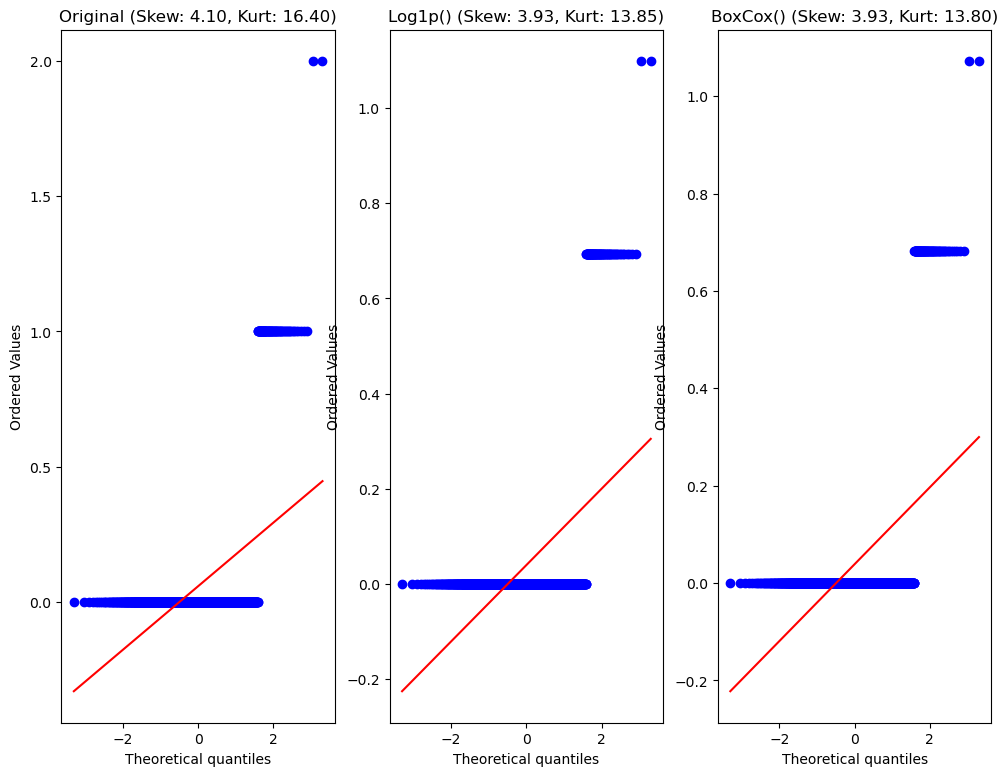

Feature #18: FullBath


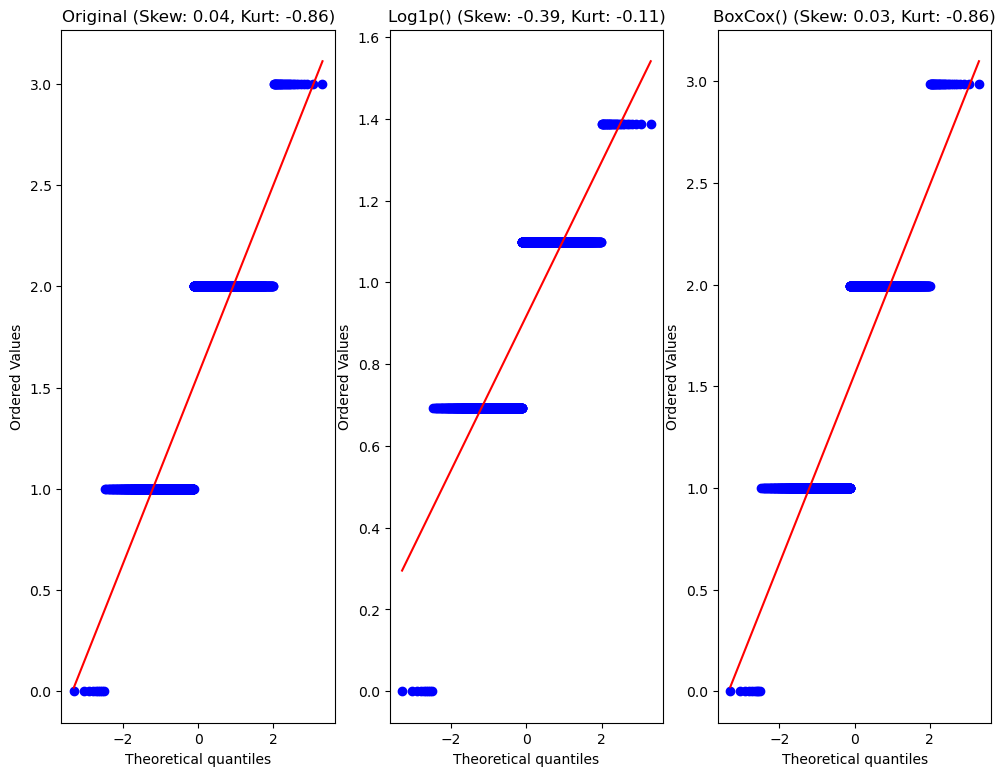

Feature #19: HalfBath


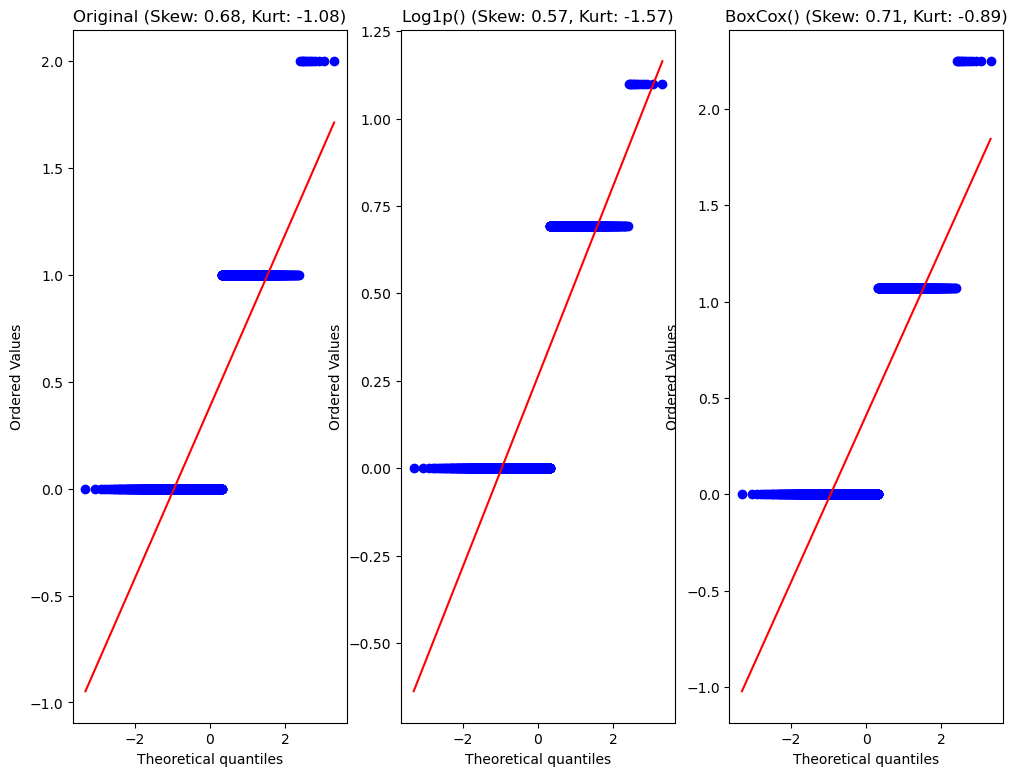

Feature #20: BedroomAbvGr


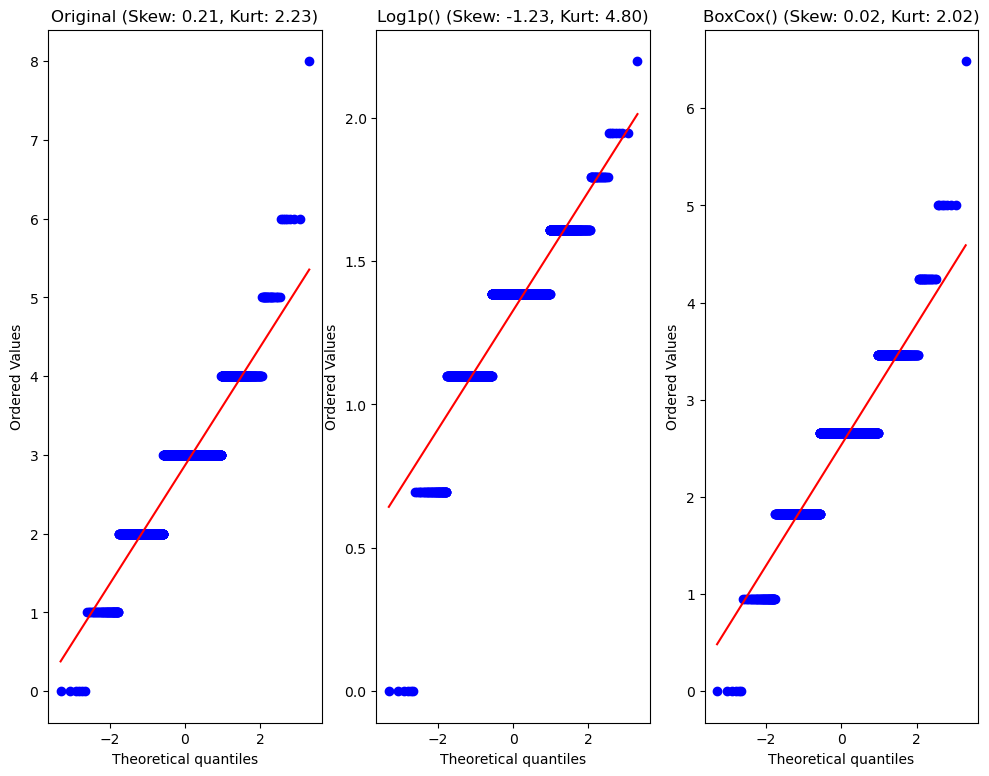

Feature #21: KitchenAbvGr


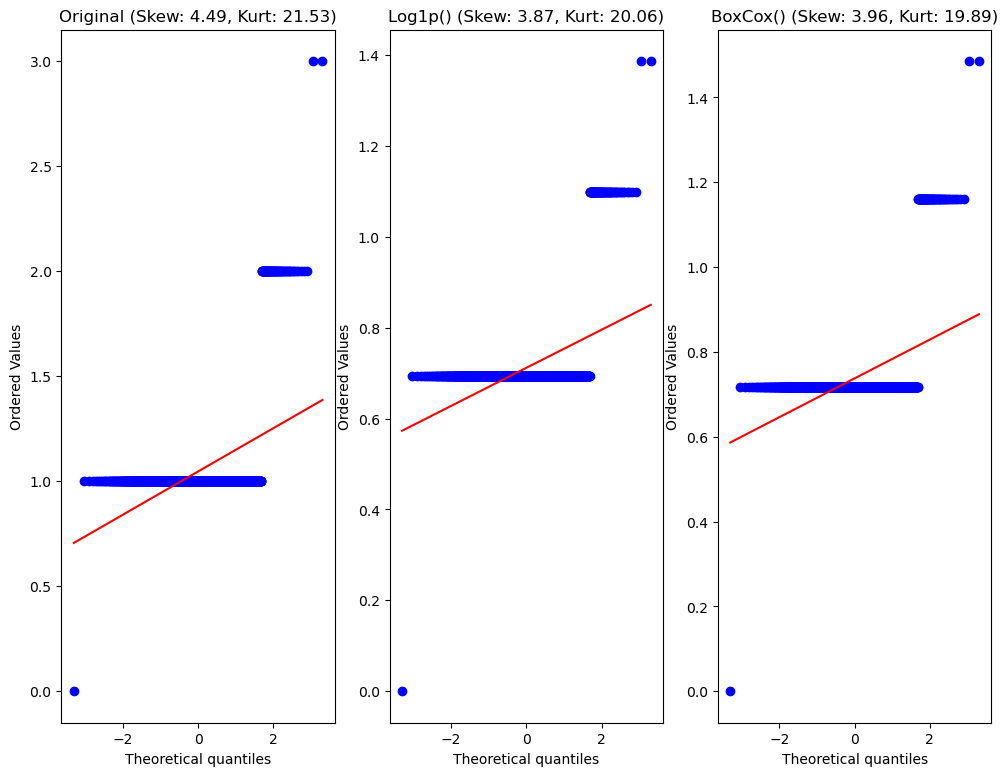

Feature #22: TotRmsAbvGrd


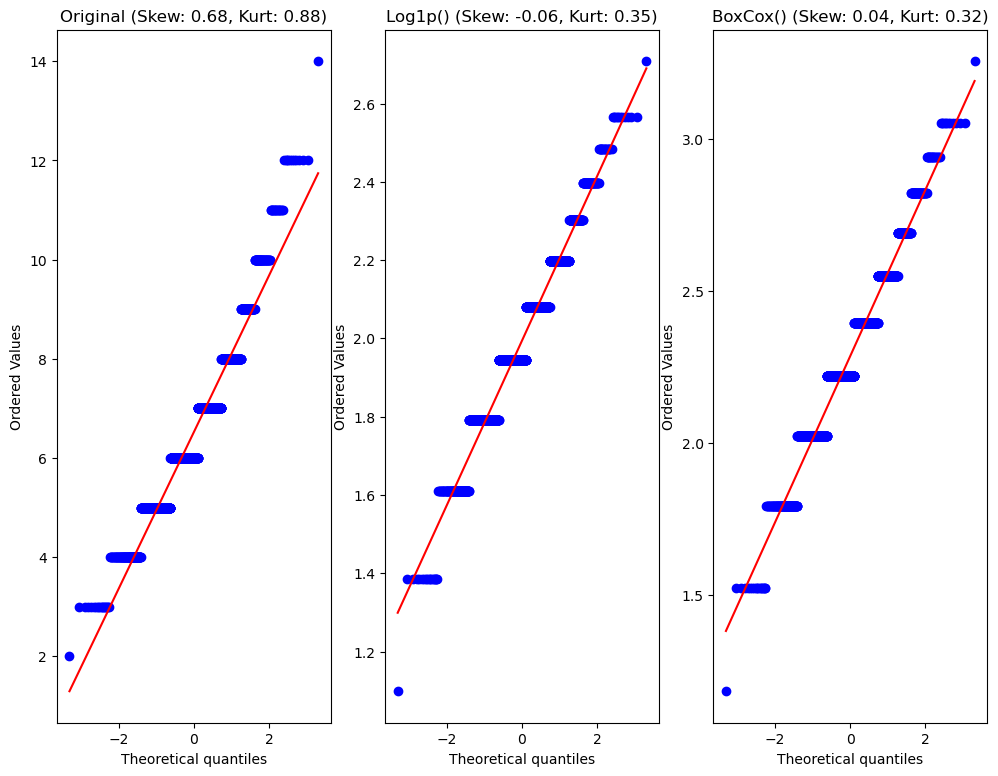

Feature #23: Fireplaces


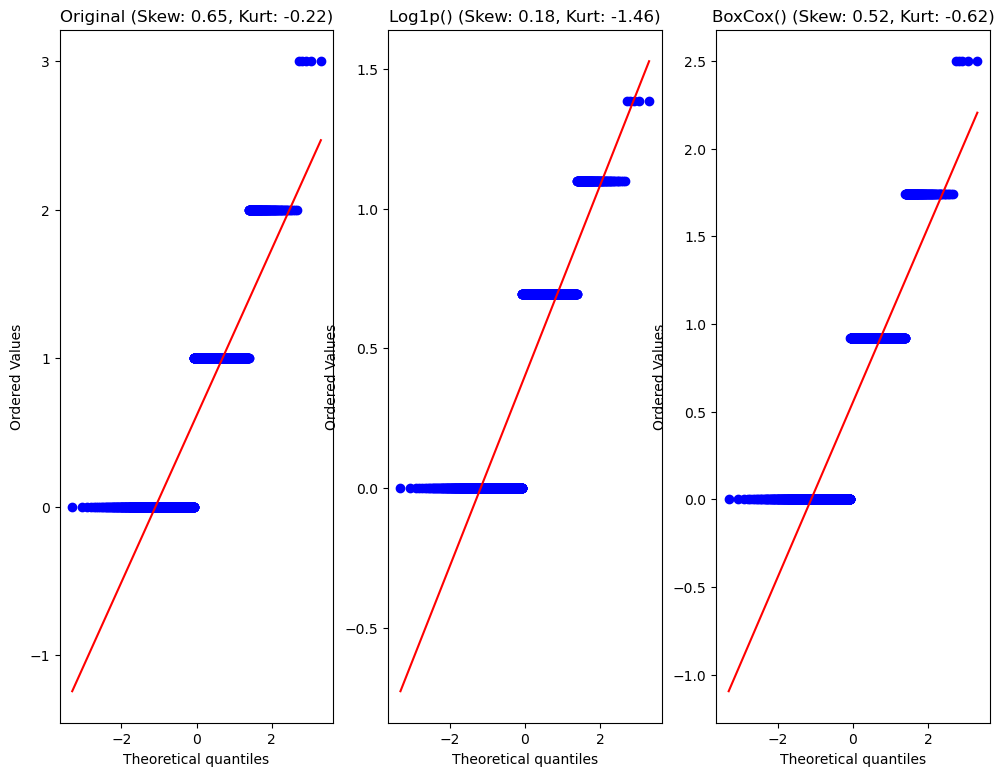

Feature #24: GarageYrBlt


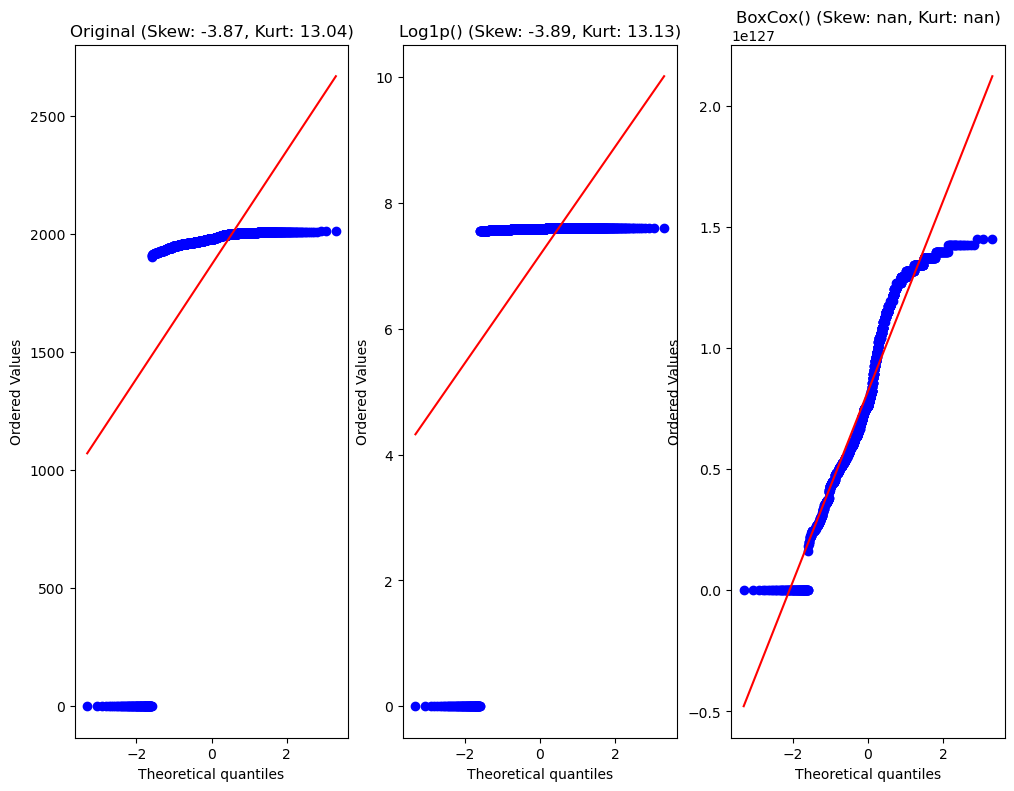

Feature #25: GarageCars


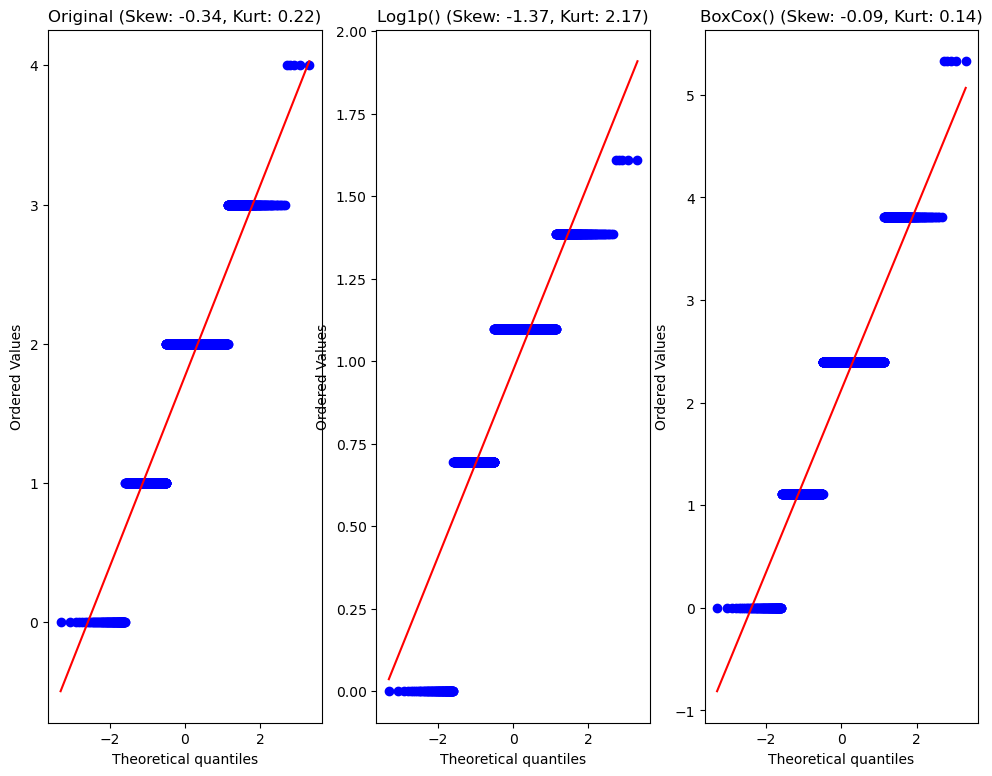

Feature #26: GarageArea


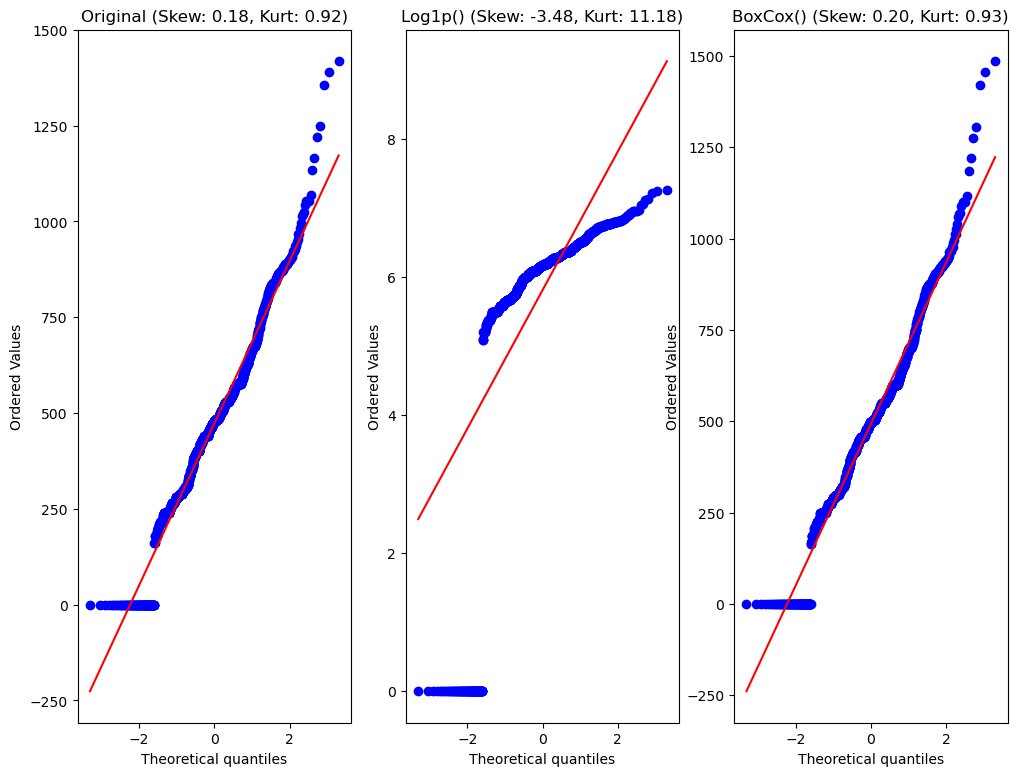

Feature #27: WoodDeckSF


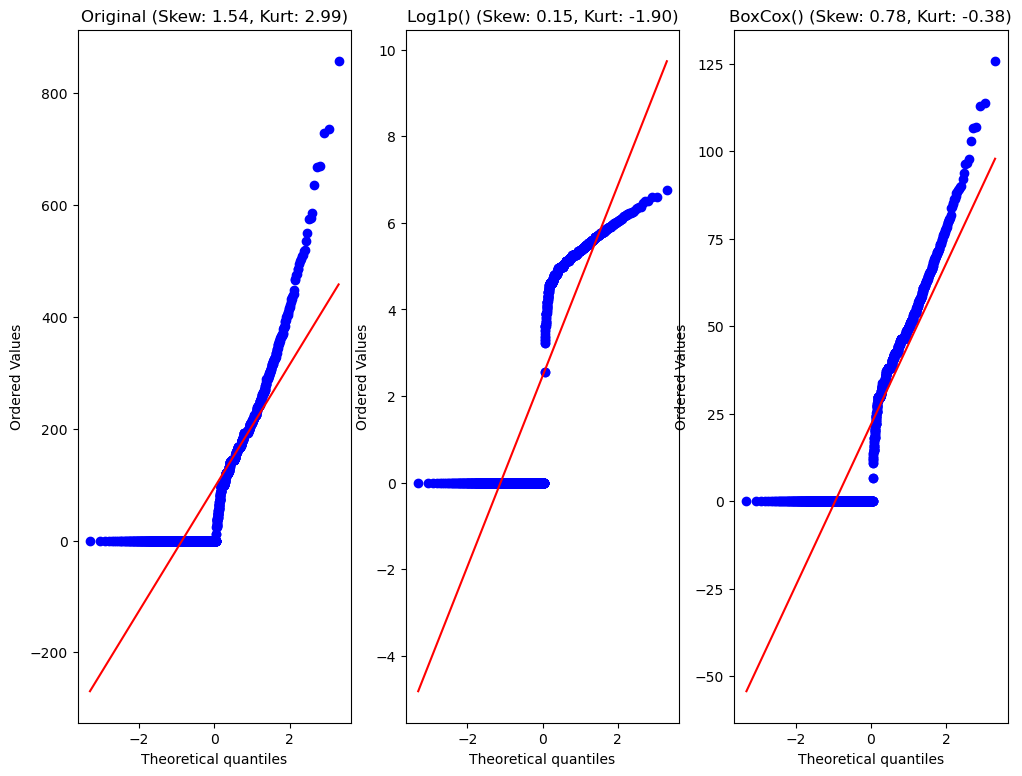

Feature #28: OpenPorchSF


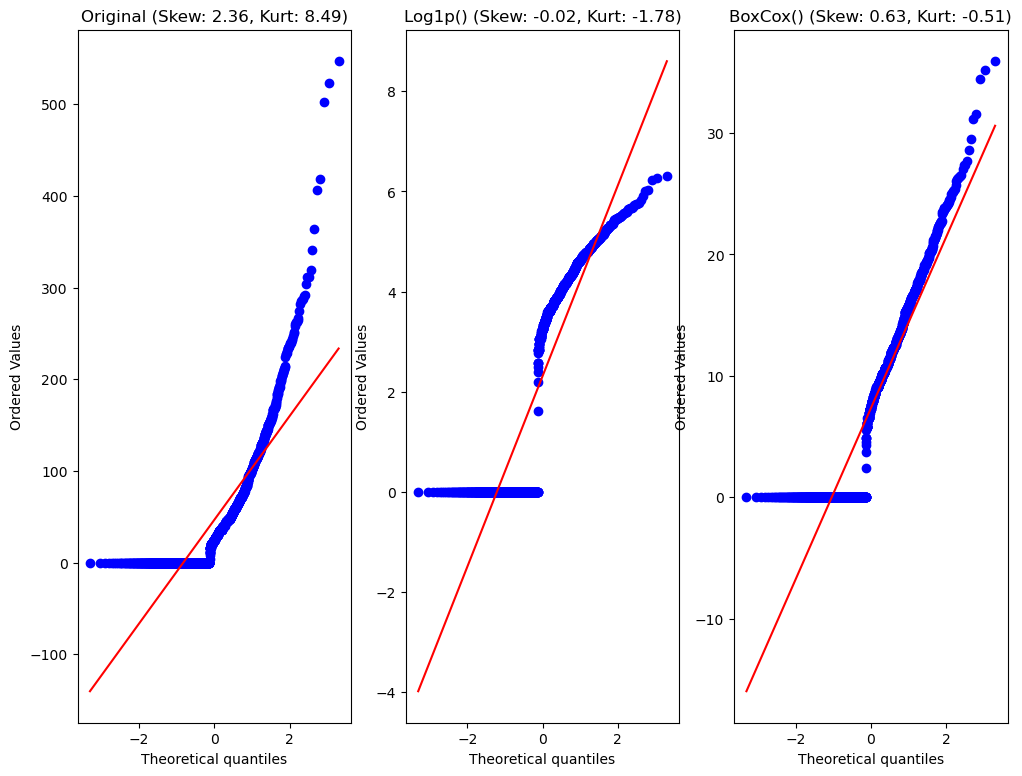

Feature #29: EnclosedPorch


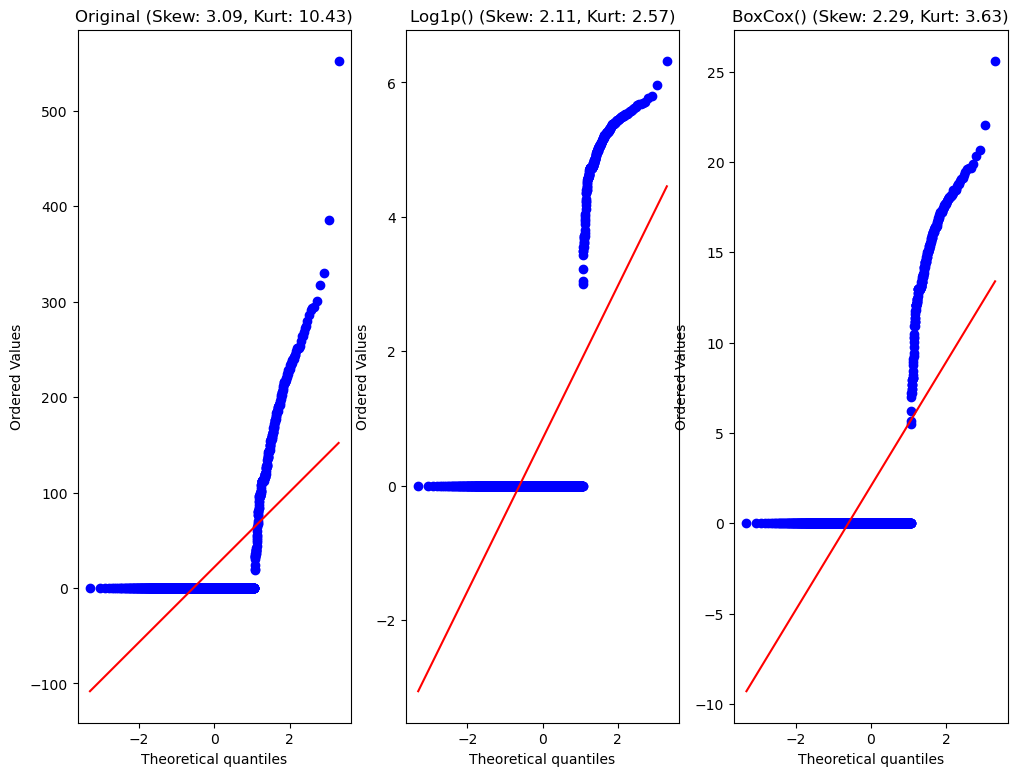

Feature #30: 3SsnPorch


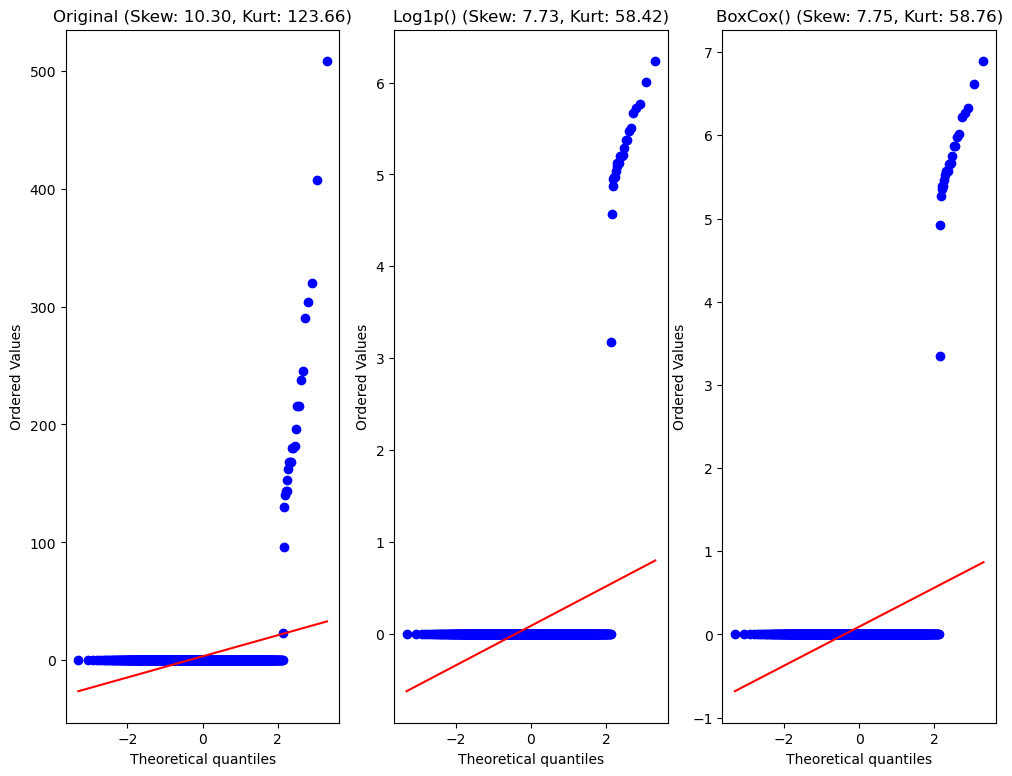

Feature #31: ScreenPorch


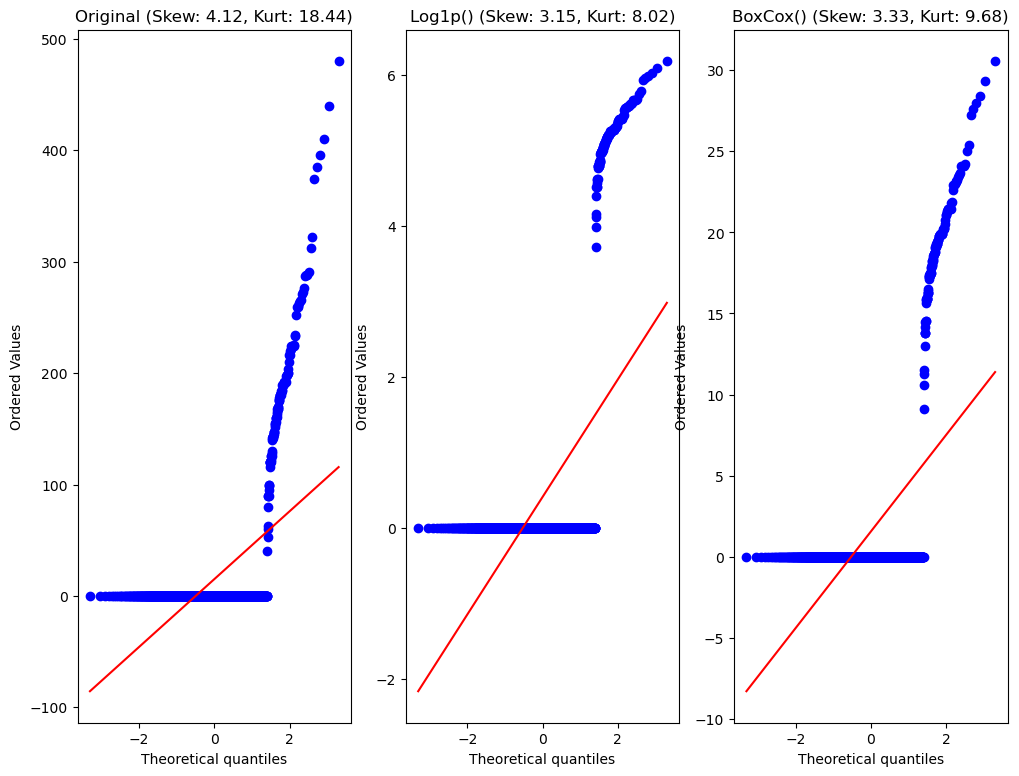

Feature #32: PoolArea


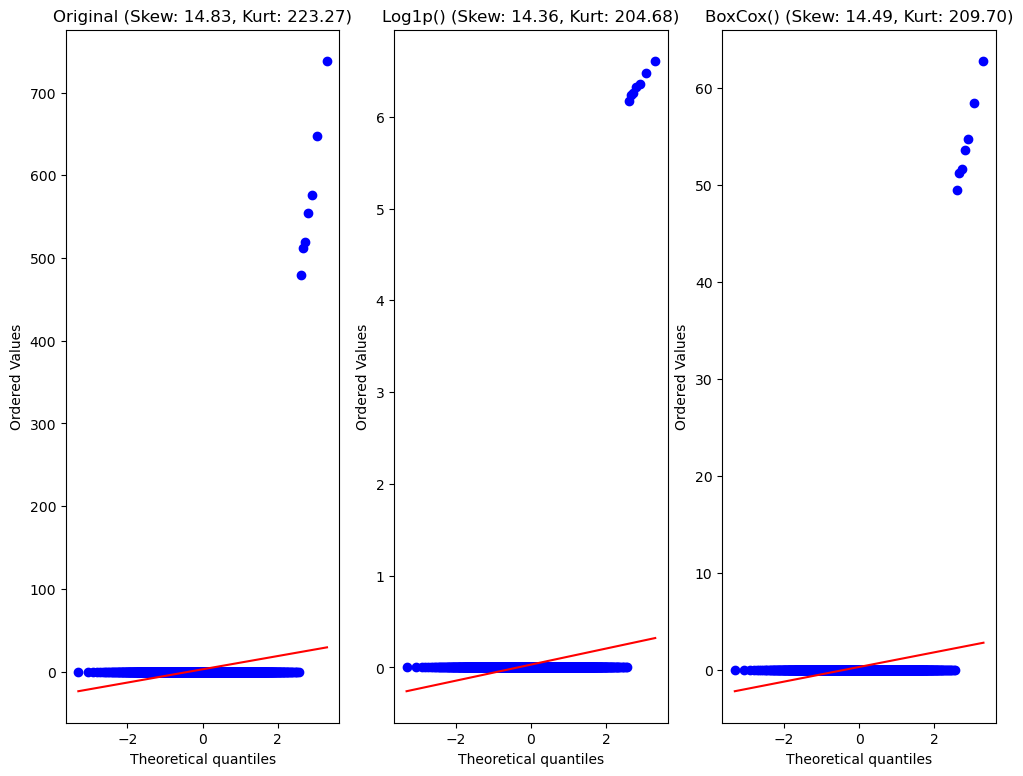

Feature #33: MiscVal


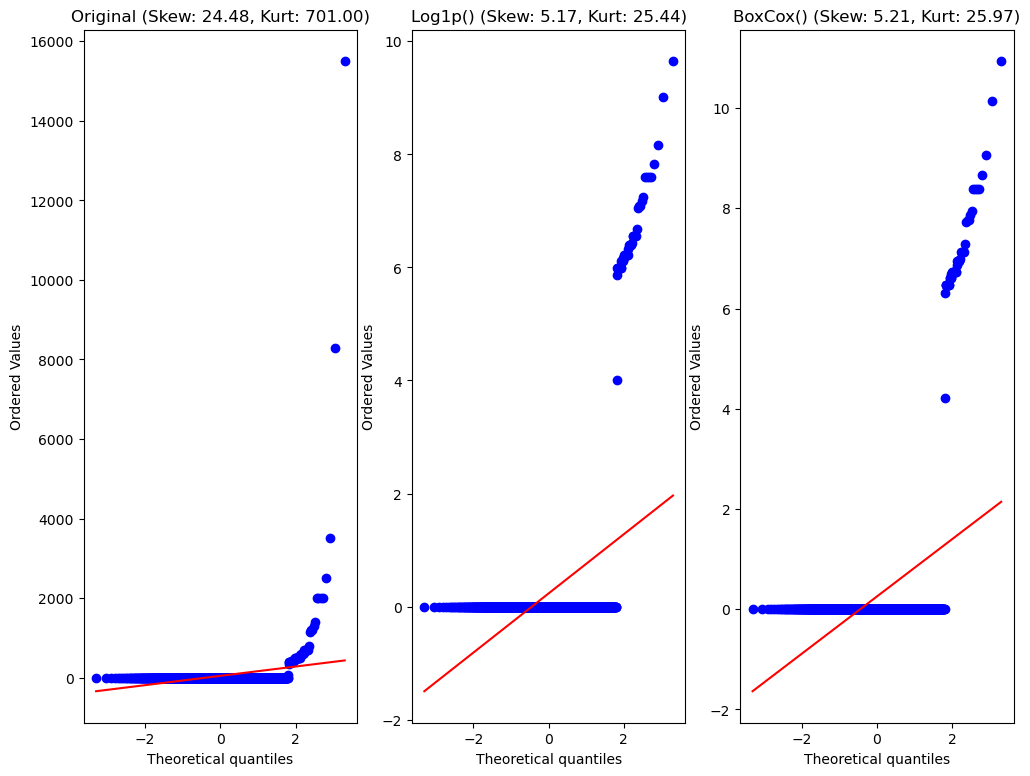

Feature #34: MoSold


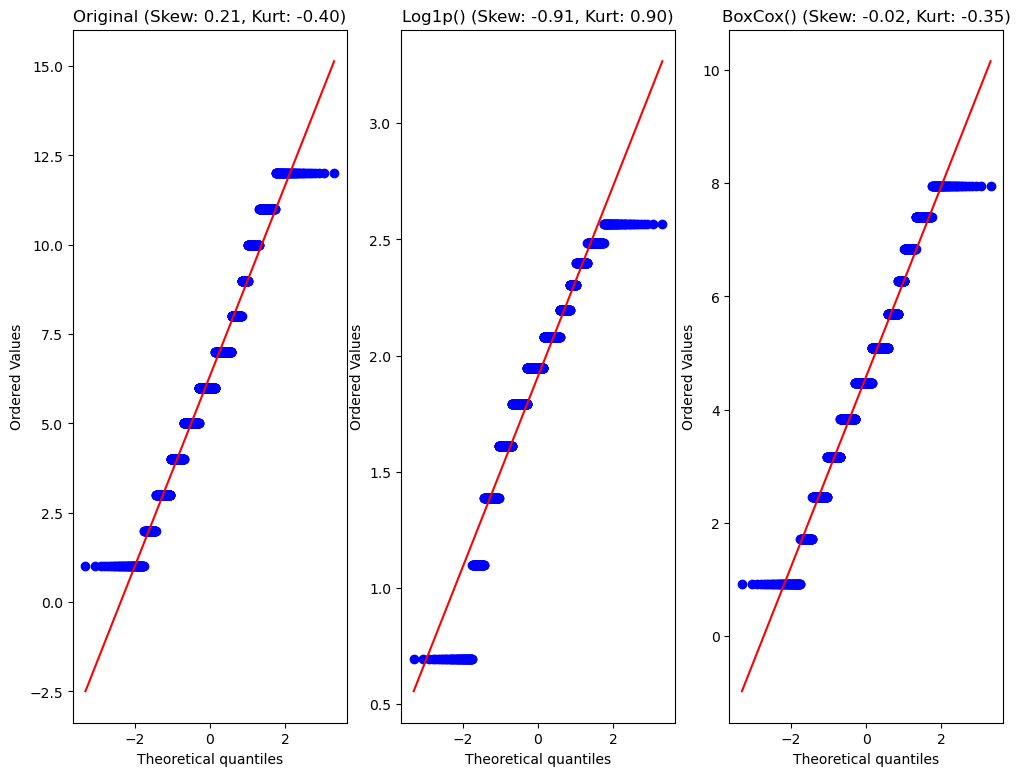

Feature #35: YrSold


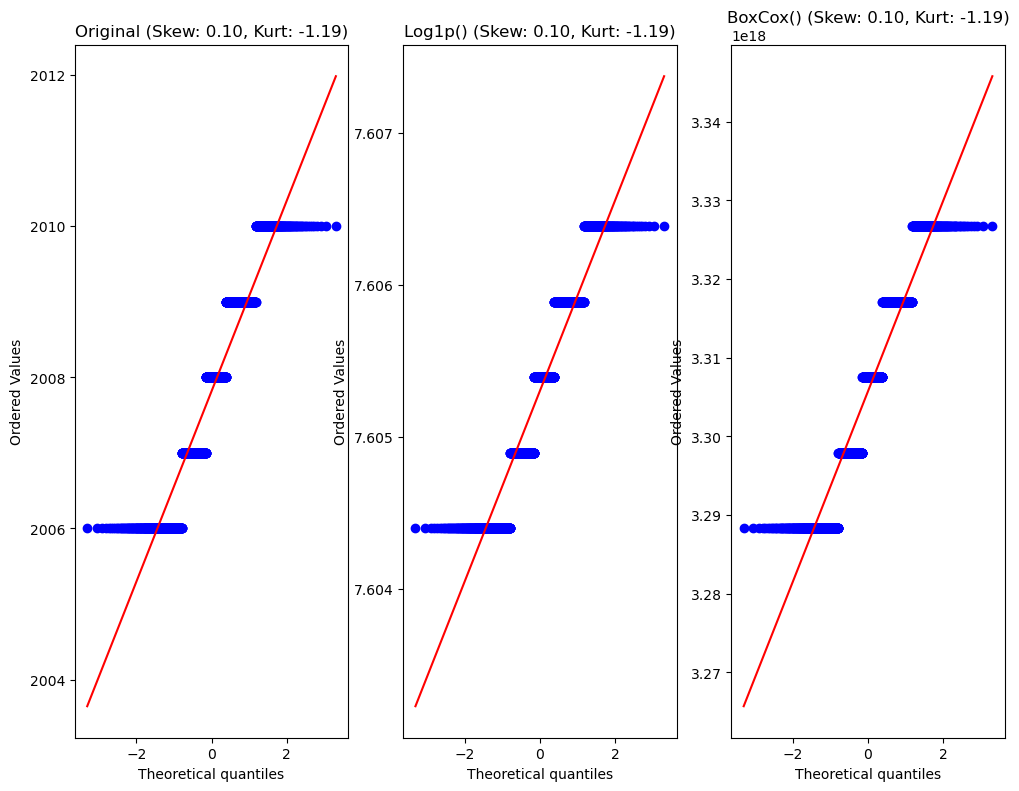

Feature #36: SalePrice


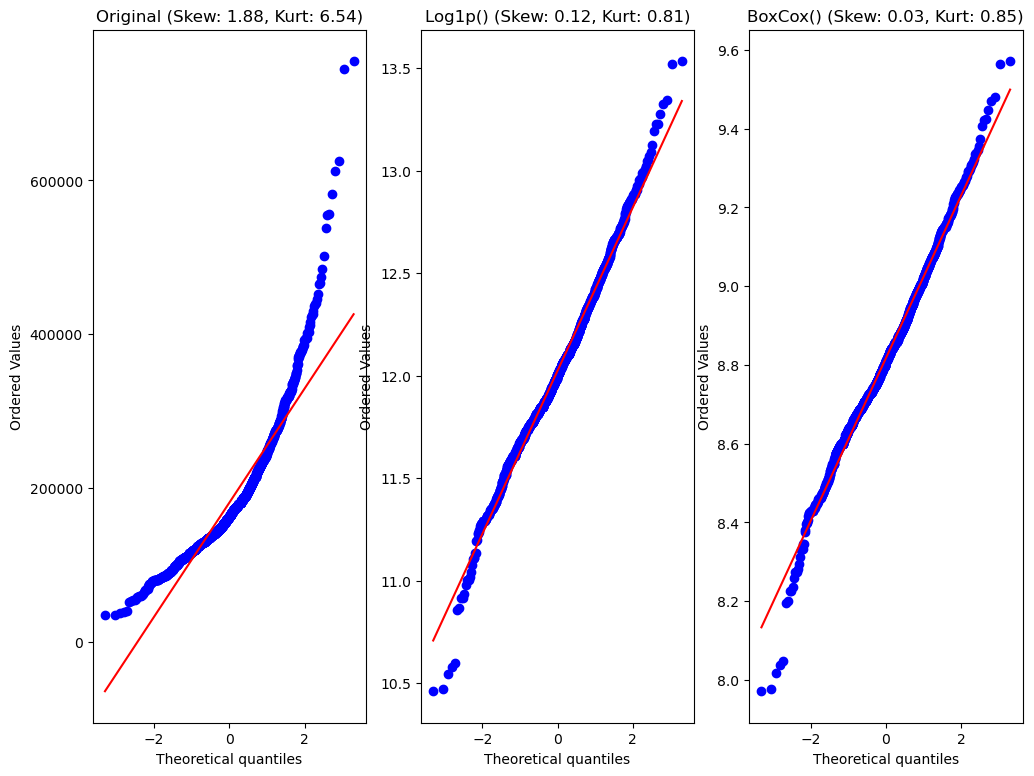

In [10]:
def plot_feature_distribution(feature, col):
    """ Shows feature distribution to analyse if it needs normalization """
    
    plt.figure(figsize=(12,9))
    
    ax1 = plt.subplot(131)
    stats.probplot(feature, plot=ax1)
    ax1.set_title("Original (Skew: {:.2f}, Kurt: {:.2f})".format(feature.skew(), feature.kurt()))
    
    ax2 = plt.subplot(132)
    stats.probplot(np.log1p(feature), plot=ax2)
    ax2.set_title("Log1p() (Skew: {:.2f}, Kurt: {:.2f})".format(np.log1p(feature).skew(), np.log1p(feature).kurt()))
    ax3 = plt.subplot(133)
    cox = boxcox1p(feature, boxcox_normmax(feature + 1))
    stats.probplot(cox, plot=ax3)
    ax3.set_title("BoxCox() (Skew: {:.2f}, Kurt: {:.2f})".format(cox.skew(), cox.kurt()))
    
    plt.show()
    
    
def show_all_features():
    numerical_features = train.select_dtypes(exclude="object").columns
    for ind, col in enumerate(numerical_features):
        feature = train[col]
        print("Feature #{}: {}".format(ind, col))
        plot_feature_distribution(feature, col)
        
show_all_features()

In [11]:
outliers = {"LotFrontage": 300, "LotArea": 100000,
            "BsmtFinSF1": 5000, "MasVnrArea": 1300,
            "BsmtFinSF2": 1300, "TotalBsmtSF": 5000,
            "1stFlrSF": 4000, "GrLivArea": 5000,
            "OpenPorchSF": 470, "EnclosedPorch": 500,
            "SalePrice": 700000}

ext_outliers = [30, 88, 462, 631, 1322]

In [13]:
outlier_ind = set()
numerical_features = train.select_dtypes(exclude="object").columns
for feature_name, max_value in outliers.items():
    x = train[feature_name]
    x = x[x > max_value]
    outlier_ind.update(list(x.index))

outlier_ind.update(ext_outliers)
outlier_ind

{30,
 88,
 197,
 249,
 297,
 313,
 322,
 335,
 462,
 495,
 583,
 631,
 691,
 706,
 934,
 1169,
 1182,
 1298,
 1322,
 1328}

In [14]:
train.drop(outlier_ind, inplace=True)
train.shape

(1440, 79)

In [15]:
num_to_category = ["MSSubClass", "MoSold", "YrSold"]
for ntc in num_to_category:
    train[ntc] = train[ntc].apply(str)
train[num_to_category[0]]

0       60
1       20
2       60
3       70
4       60
        ..
1455    60
1456    20
1457    70
1458    20
1459    20
Name: MSSubClass, Length: 1440, dtype: object

In [16]:
boxcox_num_feature_max = {}

original_numeric_features = list(train.select_dtypes(exclude="object").columns)   # Save it before we add new features
original_numeric_features.remove("YearRemodAdd")    # Problematic feature. It gets to 1e+240 if you apply box-cox

for feature_name in original_numeric_features:
    boxcox_num_feature_max[feature_name] = boxcox_normmax(train[feature_name] + 1)
    train[feature_name] = boxcox1p(train[feature_name], boxcox_num_feature_max[feature_name])

C:\Users\vaibh\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
C:\Users\vaibh\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:4461: NearConstantInputWarning: An input array is nearly constant; the computed correlation coefficient may be inaccurate.
  warnings.warn(stats.NearConstantInputWarning(msg))


In [17]:
train["BsmtFinType1_Unf"] = 1*(train["BsmtFinType1"] == "Unf")
train["HasWoodDeck"] = (train["WoodDeckSF"] == 0) * 1
train["HasOpenPorch"] = (train["OpenPorchSF"] == 0) * 1
train["HasEnclosedPorch"] = (train["EnclosedPorch"] == 0) * 1
train["Has3SsnPorch"] = (train["3SsnPorch"] == 0) * 1
train["HasScreenPorch"] = (train["ScreenPorch"] == 0) * 1
train["YearsSinceRemodel"] = train["YrSold"].astype(int) - train["YearRemodAdd"].astype(int)
train["Total_Home_Quality"] = train["OverallQual"] + train["OverallCond"]
train["TotalSF"] = train["TotalBsmtSF"] + train["1stFlrSF"] + train["2ndFlrSF"]
train["YrBltAndRemod"] = train["YearBuilt"] + train["YearRemodAdd"]

train["Total_sqr_footage"] = (train["BsmtFinSF1"] + train["BsmtFinSF2"] + train["1stFlrSF"] + train["2ndFlrSF"])
train["Total_Bathrooms"] = (train["FullBath"] + (0.5 * train["HalfBath"]) + train["BsmtFullBath"] + (0.5 * train["BsmtHalfBath"]))
train["Total_porch_sf"] = (train["OpenPorchSF"] + train["3SsnPorch"] + train["EnclosedPorch"] + train["ScreenPorch"] + train["WoodDeckSF"])

train["haspool"] = train["PoolArea"].apply(lambda x: 1 if x > 0 else 0)
train["has2ndfloor"] = train["2ndFlrSF"].apply(lambda x: 1 if x > 0 else 0)
train["hasgarage"] = train["GarageArea"].apply(lambda x: 1 if x > 0 else 0)
train["hasbsmt"] = train["TotalBsmtSF"].apply(lambda x: 1 if x > 0 else 0)
train["hasfireplace"] = train["Fireplaces"].apply(lambda x: 1 if x > 0 else 0)


# Feature Engineering: Updated new features
train["YearRemodAdd_super_old"] = 1 * (train["YearRemodAdd"] <= 1950)

new_zero_features = ("MasVnrArea", "BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF", "LowQualFinSF", "GarageYrBlt", "MiscVal")
for col in new_zero_features:
    train[col+"_zero"] = 1 * (train[col]  == 0)

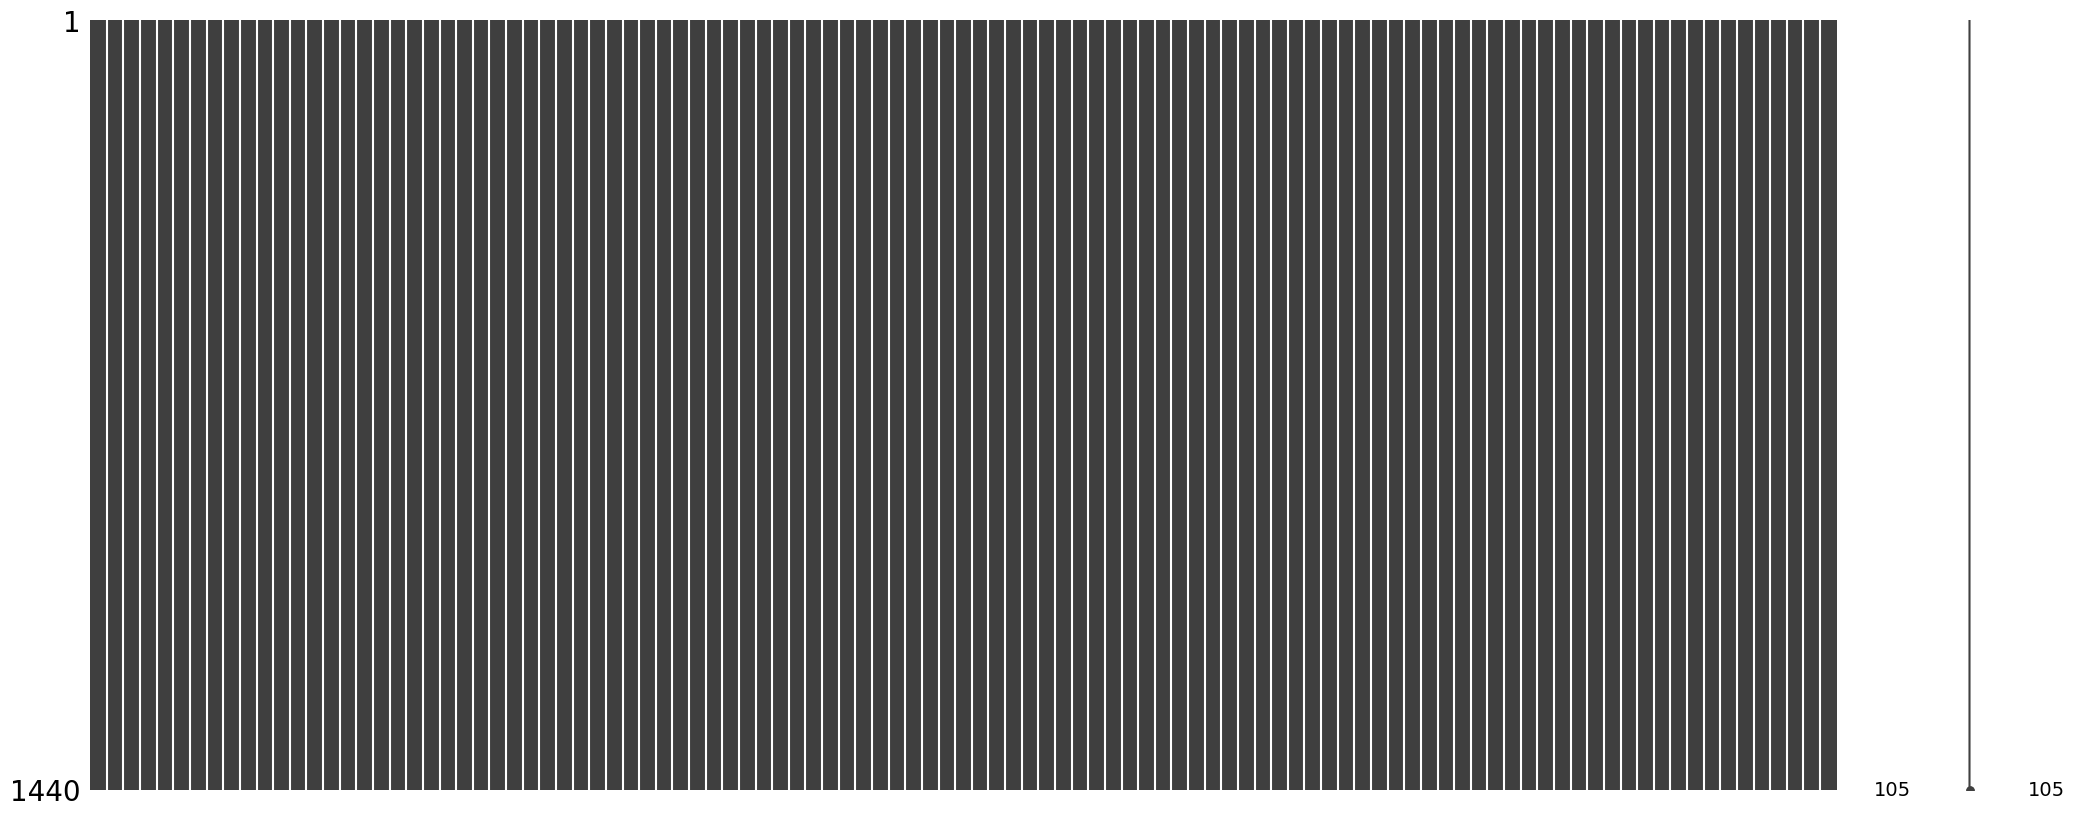

,Missing Ratio


In [18]:
msno.matrix(train);
plt.show()

all_data_na = (train.isnull().sum() / len(train)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({"Missing Ratio" :all_data_na})
missing_data.head(5)

In [19]:
train_categorical = train.select_dtypes(include="object")
train_numerical = train.select_dtypes(exclude="object")

assert train_numerical.isna().sum().sum() == 0
assert train_categorical.isna().sum().sum() == 0
assert train_categorical.shape[1] + train_numerical.shape[1] == train.shape[1]

train_numerical.shape, train_categorical.shape, train.shape

((1440, 60), (1440, 45), (1440, 105))

In [20]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(handle_unknown='ignore')
ohe.fit(train_categorical)

ohe_categories = pd.DataFrame(ohe.transform(train_categorical).toarray(), 
                                  columns=list(ohe.get_feature_names_out()),
                                  index=train_categorical.index, 
                                  dtype=int)
ohe_categories.head()

,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0


In [21]:
train = pd.concat([train_numerical, ohe_categories], axis=1)
train.shape

(1440, 353)

In [22]:
train.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,27.984143,25.596828,5.371387,2.969544,1.227758e+52,2003,20.742574,187.422823,0.0,30.411991,...,0,0,0,1,0,0,0,0,1,0
1,32.732091,26.389703,4.698376,4.123193,9.863329e+51,1976,0.000000,240.091028,0.0,44.853807,...,0,0,0,1,0,0,0,0,1,0
2,28.955092,27.403995,5.371387,2.969544,1.208129e+52,2002,18.912331,141.064419,0.0,57.909562,...,0,0,0,1,0,0,0,0,1,0
3,26.339102,26.356854,5.371387,2.969544,5.947317e+51,1970,0.000000,75.950006,0.0,66.014457,...,0,0,0,1,1,0,0,0,0,0
4,33.956970,28.981705,6.028012,2.969544,1.198425e+52,2000,27.356335,177.034856,0.0,62.282476,...,0,0,0,1,0,0,0,0,1,0


In [23]:
y = train["SalePrice"]
X = train.drop(["SalePrice"], axis=1)

In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)

X = pd.DataFrame(scaler.transform(X))
X.head()

,0,1,2,3,4,5,6,7,8,9,...,342,343,344,345,346,347,348,349,350,351
0,-0.189973,-0.166168,0.679707,-0.500591,1.125774,0.878641,1.023098,0.717083,-0.347161,-0.940272,...,-0.059028,-0.30288,-0.045691,0.391053,-0.268750,-0.052778,-0.09167,-0.118678,0.466095,-0.306961
1,0.544591,0.099585,-0.043937,2.087460,0.046338,-0.428929,-0.744266,1.233698,-0.347161,-0.508328,...,-0.059028,-0.30288,-0.045691,0.391053,-0.268750,-0.052778,-0.09167,-0.118678,0.466095,-0.306961
2,-0.039755,0.439551,0.679707,-0.500591,1.038009,0.830213,0.867153,0.262360,-0.347161,-0.117841,...,-0.059028,-0.30288,-0.045691,0.391053,-0.268750,-0.052778,-0.09167,-0.118678,0.466095,-0.306961
3,-0.444480,0.088575,0.679707,-0.500591,-1.704547,-0.719500,-0.744266,-0.376339,-0.347161,0.124571,...,-0.059028,-0.30288,-0.045691,0.391053,3.720935,-0.052778,-0.09167,-0.118678,-2.145487,-0.306961
4,0.734094,0.968360,1.385733,-0.500591,0.994622,0.733356,1.586622,0.615189,-0.347161,0.012950,...,-0.059028,-0.30288,-0.045691,0.391053,-0.268750,-0.052778,-0.09167,-0.118678,0.466095,-0.306961


In [25]:
y

0       8.183685
1       8.125234
2       8.212751
3       8.014256
4       8.259328
          ...   
1455    8.109767
1456    8.186691
1457    8.285731
1458    8.020752
1459    8.036729
Name: SalePrice, Length: 1440, dtype: float64

In [26]:
X.shape, y.shape

((1440, 352), (1440,))

In [28]:
!pip install mlxtend

     ---------------------------------------- 1.4/1.4 MB 2.9 MB/s eta 0:00:00


In [30]:
!pip install lightgbm

     ---------------------------------------- 1.0/1.0 MB 10.9 MB/s eta 0:00:00


In [31]:
from sklearn.linear_model import ElasticNetCV, LassoCV, RidgeCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from mlxtend.regressor import StackingCVRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from datetime import datetime
import numpy as np

kfolds = KFold(n_splits=10, shuffle=True, random_state=42)

def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

def cv_rmse(model, X=X, y=y):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=kfolds))
    return (rmse)

In [32]:
alphas_alt = [14.5, 14.6, 14.7, 14.8, 14.9, 15, 15.1, 15.2, 15.3, 15.4, 15.5]
alphas2 = [5e-05, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008]
e_alphas = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007]
e_l1ratio = [0.8, 0.85, 0.9, 0.95, 0.99, 1]

In [33]:
ridge = make_pipeline(RobustScaler(), RidgeCV(alphas=alphas_alt, cv=kfolds))
lasso = make_pipeline(RobustScaler(), LassoCV(max_iter=int(1e5), alphas=alphas2, random_state=42, cv=kfolds))
elasticnet = make_pipeline(RobustScaler(), ElasticNetCV(max_iter=int(1e5), alphas=e_alphas, cv=kfolds, l1_ratio=e_l1ratio))                                
svr = make_pipeline(RobustScaler(), SVR(C= 20, epsilon= 0.008, gamma=0.0003,))

In [34]:
gbr = GradientBoostingRegressor(
    n_estimators=3000, 
    learning_rate=0.05,
    max_depth=4, 
    max_features='sqrt', 
    min_samples_leaf=15, 
    min_samples_split=10, 
    loss='huber', 
    random_state =42
) 
lightgbm = LGBMRegressor(objective='regression', 
                                       num_leaves=4,
                                       learning_rate=0.01, 
                                       n_estimators=5000,
                                       max_bin=200, 
                                       bagging_fraction=0.75,
                                       bagging_freq=5, 
                                       bagging_seed=7,
                                       feature_fraction=0.2,
                                       feature_fraction_seed=7,
                                       verbose=-1,
                                       )
xgboost = XGBRegressor(learning_rate=0.01,n_estimators=3460,
                                     max_depth=3, min_child_weight=0,
                                     gamma=0, subsample=0.7,
                                     colsample_bytree=0.7,
                                     objective='reg:linear', nthread=-1,    # reg:squarederror
                                     scale_pos_weight=1, seed=27,
                                     reg_alpha=0.00006)

stack_gen = StackingCVRegressor(regressors=(ridge, lasso, elasticnet, gbr, xgboost, lightgbm),
                                meta_regressor=xgboost,
                                use_features_in_secondary=True)

In [35]:
print('TEST score on CV')

score = cv_rmse(ridge)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()), datetime.now(), )

score = cv_rmse(lasso)
print("LASSO: {:.4f} ({:.4f})\n".format(score.mean(), score.std()), datetime.now(), )

score = cv_rmse(elasticnet)
print("elastic net: {:.4f} ({:.4f})\n".format(score.mean(), score.std()), datetime.now(), )

score = cv_rmse(svr)
print("SVR: {:.4f} ({:.4f})\n".format(score.mean(), score.std()), datetime.now(), )

score = cv_rmse(lightgbm)
print("lightgbm: {:.4f} ({:.4f})\n".format(score.mean(), score.std()), datetime.now(), )

score = cv_rmse(gbr)
print("gbr: {:.4f} ({:.4f})\n".format(score.mean(), score.std()), datetime.now(), )


score = cv_rmse(xgboost)
print("xgboost: {:.4f} ({:.4f})\n".format(score.mean(), score.std()), datetime.now(), )

TEST score on CV
Kernel Ridge score: 0.0532 (0.0073)
 2023-05-08 12:08:07.785164
LASSO: 0.0488 (0.0075)
 2023-05-08 12:08:28.792767
elastic net: 0.0490 (0.0076)
 2023-05-08 12:09:56.913809
SVR: 0.0535 (0.0057)
 2023-05-08 12:10:08.898842
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_

In [36]:
print('START Fit')

print('stack_gen')
stack_gen_model = stack_gen.fit(np.array(X), np.array(y))

print('elasticnet')
elastic_model_full_data = elasticnet.fit(X, y)

print('Lasso')
lasso_model_full_data = lasso.fit(X, y)

print('Ridge')
ridge_model_full_data = ridge.fit(X, y)

print('Svr')
svr_model_full_data = svr.fit(X, y)

print('GradientBoosting')
gbr_model_full_data = gbr.fit(X, y)

 

print('xgboost')
xgb_model_full_data = xgboost.fit(X, y)

print('lightgbm')
lgb_model_full_data = lightgbm.fit(X, y)

START Fit
stack_gen
[12:24:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[12:24:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[12:25:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[12:25:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[12:25:44] WARNING: C:\buildkite-agent\builds\buildkite-

In [37]:
def blend_models_predict(X):
    return ((0.1 * elastic_model_full_data.predict(X)) + \
            (0.05 * lasso_model_full_data.predict(X)) + \
            (0.1 * ridge_model_full_data.predict(X)) + \
            (0.1 * svr_model_full_data.predict(X)) + \
            (0.1 * gbr_model_full_data.predict(X)) + \
            (0.15 * xgb_model_full_data.predict(X)) + \
            (0.1 * lgb_model_full_data.predict(X)) + \
            (0.3 * stack_gen_model.predict(np.array(X))))

In [38]:
print('RMSLE score on train data:')
print(rmsle(y, blend_models_predict(X)))


RMSLE score on train data:
0.021844355655896715
